In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from statistics import *
from matplotlib.lines import Line2D 
from matplotlib.figure import *
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker
from astropy.io import fits

## Isochrone

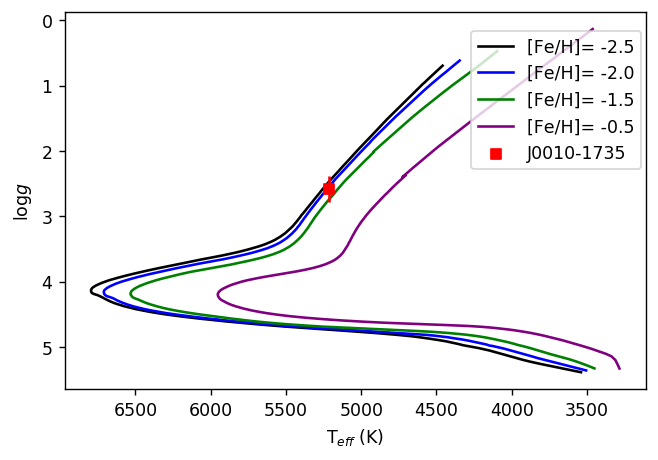

In [17]:
#ADOPTED: unlogged 
logt_s=3.717
logg_s=2.58

t_s=10**3.717

iso12_25=np.genfromtxt("iso12_2.5.txt", delimiter=",", names=["x","a", "b", "logt","logg","c","d","e","f"])
iso12_2=np.genfromtxt("iso12_2.txt", delimiter=",", names=["x","a", "b", "logt","logg","c","d","e","f"])
iso12_15=np.genfromtxt("iso12_1.5.txt", delimiter=",", names=["x","a", "b", "logt","logg","c","d","e","f"])
iso12_05=np.genfromtxt("iso12_0.5.txt", delimiter=",", names=["x","a", "b", "logt","logg","c","d","e","f"])

temps12_25=[]
for i in iso12_25['logt']:
    t=10**i
    temps12_25.append(t)

temps12_2=[]
for i in iso12_2['logt']:
    t=10**i
    temps12_2.append(t)
    
temps12_15=[]
for i in iso12_15['logt']:
    t=10**i
    temps12_15.append(t)
    
temps12_05=[]
for i in iso12_05['logt']:
    t=10**i
    temps12_05.append(t)

plt.figure(dpi=125)
plt.scatter(t_s,logg_s,color='red',marker='s',label='J0010-1735',zorder=5)
plt.plot(temps12_25, iso12_25['logg'],color='black',label='[Fe/H]= -2.5')
plt.plot(temps12_2, iso12_2['logg'],color='blue',label='[Fe/H]= -2.0')
plt.plot(temps12_15, iso12_15['logg'],color='green',label='[Fe/H]= -1.5')
plt.plot(temps12_05, iso12_05['logg'],color='purple',label='[Fe/H]= -0.5')
plt.errorbar(t_s,logg_s,yerr=0.2,color='red',zorder=5)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel(r"T$_{eff}$ (K)")
plt.ylabel(r"$\log g$")
plt.legend(bbox_to_anchor=(0.7, 0.95), loc='upper left', borderaxespad=0.)

## Spectra Plots

In [13]:
#trying what this website says: https://sdss-mangadap.readthedocs.io/en/latest/_modules/mangadap/util/fileio.html
import os
import warnings
import gzip
import shutil
import logging

def wavelength_vector(npix, header, log10=False):
    """
    Return a vector with wavelength coordinates drawn from the WCS
    coordinates in the header.  The function uses CRVAL1, CRPIX1,
    CDELT1.

    Args:
        npix (:obj:`int`):
            Length of the vector in pixels.
        header (`astropy.io.fits.Header`_):
            Header with the WCS data
        log10 (:obj:`bool`, optional):
            Flag that the wavelengths are logarithmically sampled.

    Returns:
        `numpy.ndarray`_: Wavelengths of a spectrum.

    """
    crval = float(header['CRVAL1'])
    crpix = int(header['CRPIX1'])
    cdelt = float(header['CDELT1'])
    wave = (np.arange(1.0,npix+1) - crpix)*cdelt + crval
    return np.power(10., wave) if log10 else wave

def readfits_1dspec(filename, log10=False):
    """
    Read a 1D fits spectrum and return two vectors with the wavelength
    and flux.

    Args:
        filename (:obj:`str`):
            Name of the file to read.

    Returns:
        `numpy.ndarray`_: Two numpy.float64 arrays with the
        wavelength and flux read for the spectrum.

    Raises:
        ValueError:
            Raised if the input fits file has more than one extension
            or its primary extension has more than two dimensions.
    """
    hdu = fits.open(filename, mode='readonly')

    if (len(hdu)) != 1:
        warnings.warn('{0} has more than one extension.'.format(filename))
    
    if hdu[0].header['NAXIS'] != 1:
        raise ValueError('{0} is not one dimensional!'.format(filename))
    
    spec = np.copy(hdu[0].data).astype(np.float64)
    wave = wavelength_vector(spec.size, hdu[0].header, log10=log10)
    hdu.close()
    return wave, spec

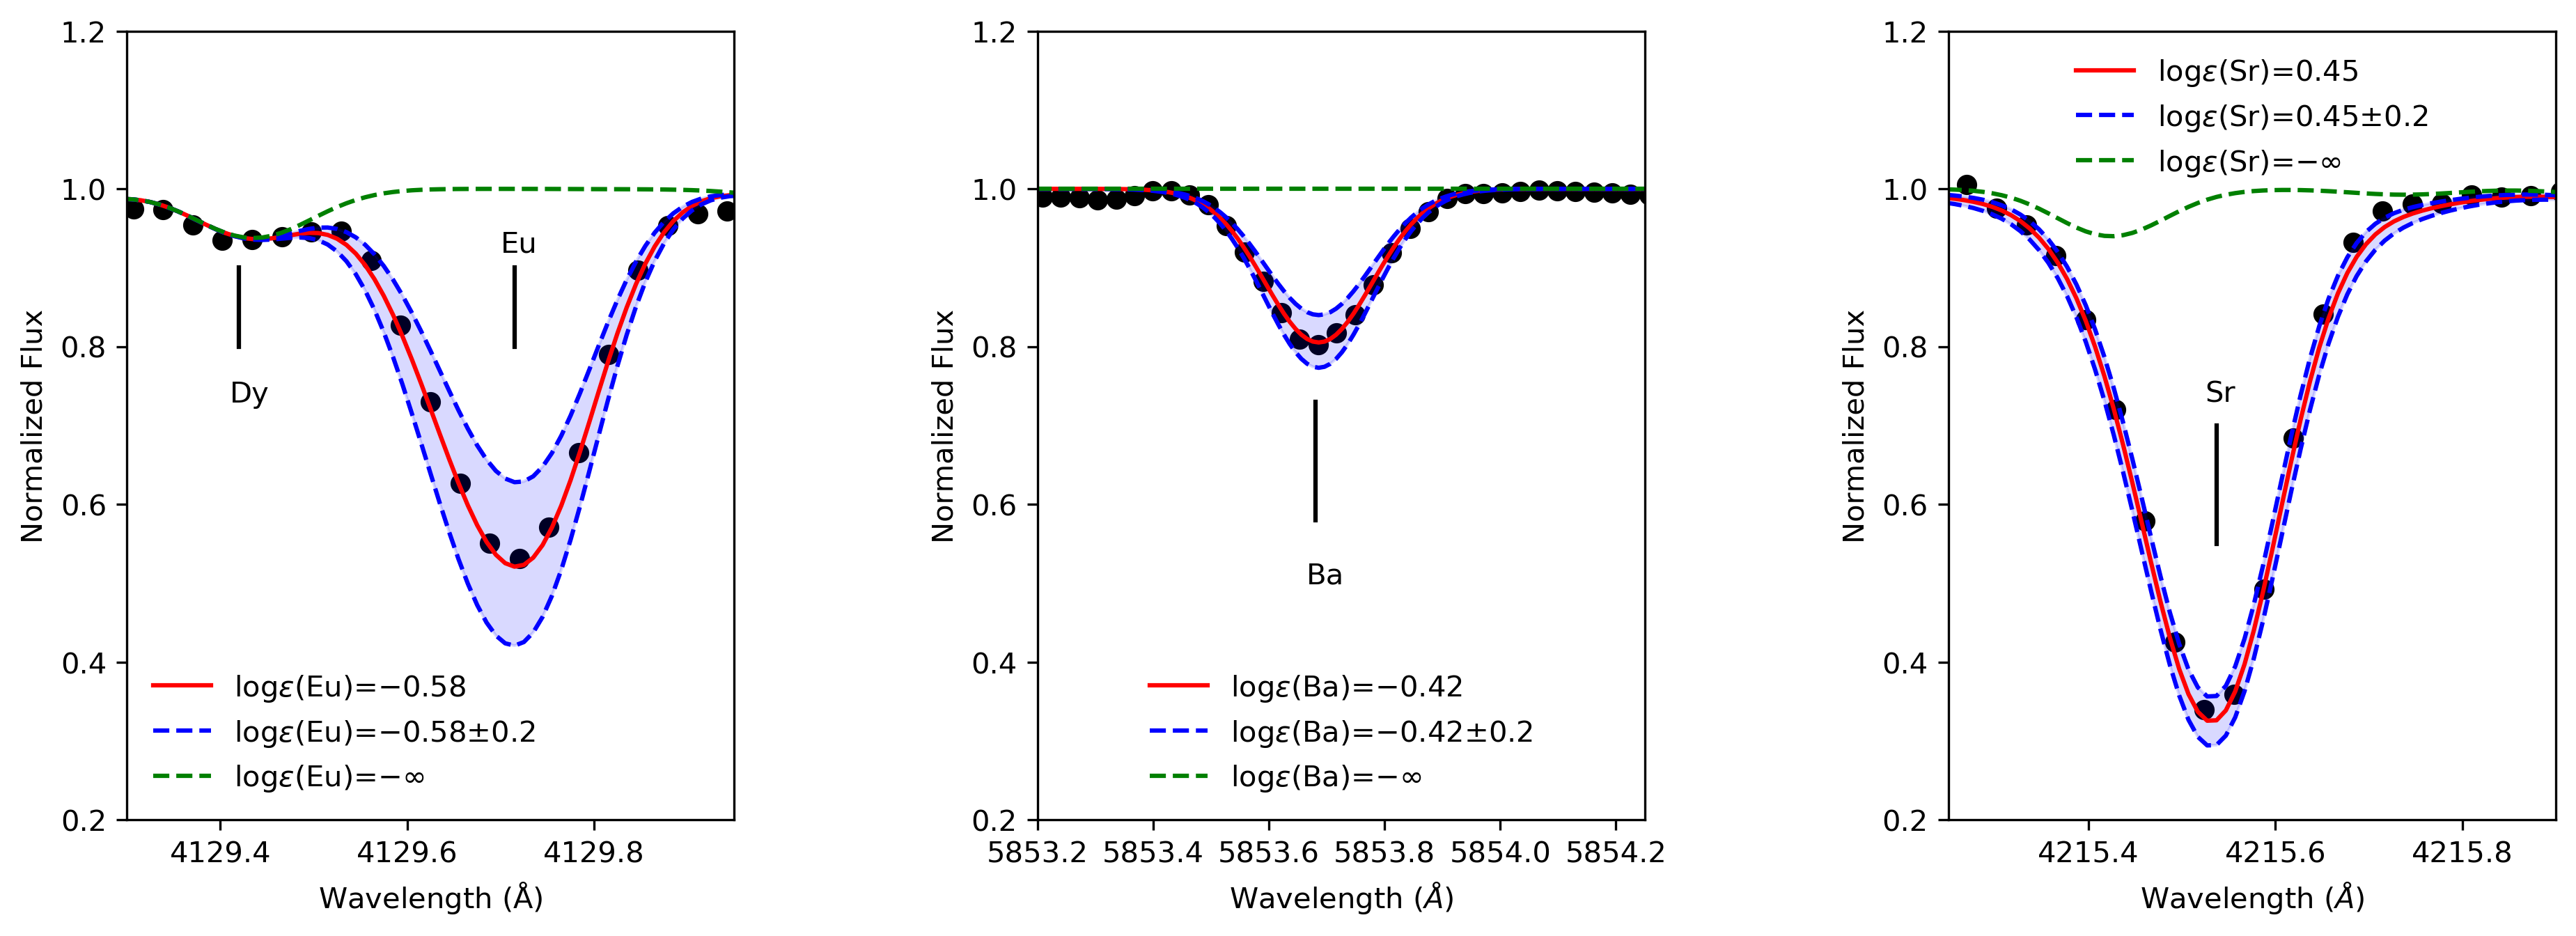

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15,5), dpi=300,
                        gridspec_kw={'hspace': 0.3, 'wspace': 0.5})

(ax1,ax2,ax3) = axs

#Eu4129
waveobs=readfits_1dspec('eu4129data.fits', log10=False)[0]
specobs=readfits_1dspec('eu4129data.fits', log10=False)[1]
wavesynth=readfits_1dspec('eu4129synth.fits', log10=False)[0]
specsynth=readfits_1dspec('eu4129synth.fits', log10=False)[1]
plserrx=readfits_1dspec('eu4129+error.fits', log10=False)[0]
plserry=readfits_1dspec('eu4129+error.fits', log10=False)[1]
minerrx=readfits_1dspec('eu4129-error.fits', log10=False)[0]
minerry=readfits_1dspec('eu4129-error.fits', log10=False)[1]
continuumx=readfits_1dspec('eu4129-10.fits', log10=False)[0]
continuumy=readfits_1dspec('eu4129-10.fits', log10=False)[1]
ax1.scatter(waveobs,specobs,color='black')
ax1.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Eu)=$-$0.58")
ax1.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Eu)=$-$0.58$\pm0.2$")
ax1.plot(minerrx,minerry,'b--')
ax1.plot(continuumx,continuumy,'g--',label=r"$\log\epsilon$(Eu)=$-\infty$")
ax1.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)

ax1.text(4129.7,0.92,'Eu')
ax1.axvline(4129.715,0.6,0.7,color='black')
ax1.text(4129.41,0.73,'Dy')
ax1.axvline(4129.42,0.6,0.7,color='black')

ax1.ticklabel_format(useOffset=False)
ax1.set_xlabel(r"Wavelength $(\mathrm{\AA})$")
ax1.set_ylabel('Normalized Flux')
ax1.set_xlim(4129.3,4129.95)
ax1.set_ylim(0.2,1.2)
ax1.legend(loc='lower left', frameon=False)

#Ba5853
waveobs=readfits_1dspec('ba5853data.fits', log10=False)[0]
specobs=readfits_1dspec('ba5853data.fits', log10=False)[1]
wavesynth=readfits_1dspec('ba5853synth.fits', log10=False)[0]
specsynth=readfits_1dspec('ba5853synth.fits', log10=False)[1]
plserrx=readfits_1dspec('ba5853+error.fits', log10=False)[0]
plserry=readfits_1dspec('ba5853+error.fits', log10=False)[1]
minerrx=readfits_1dspec('ba5853-error.fits', log10=False)[0]
minerry=readfits_1dspec('ba5853-error.fits', log10=False)[1]
continuumx=readfits_1dspec('ba5853-10.fits', log10=False)[0]
continuumy=readfits_1dspec('ba5853-10.fits', log10=False)[1]

ax2.scatter(waveobs,specobs,color='black')
ax2.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Ba)=$-$0.42")
ax2.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Ba)=$-$0.42$\pm0.2$")
ax2.plot(minerrx,minerry,'b--')
ax2.plot(continuumx,continuumy,'g--',label=r"$\log\epsilon$(Ba)=$-\infty$")
ax2.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)
ax2.set_xlabel(r"Wavelength $(\AA)$")
ax2.set_ylabel('Normalized Flux')
ax2.text(5853.665,0.5,'Ba')
ax2.axvline(5853.68,0.38,0.53,color='black')
#original: ax2.set_xlim(5853.4,5854)
ax2.set_xlim(5853.2,5854.25)
ax2.set_ylim(0.2,1.2)
ax2.legend(loc='lower center', frameon=False)

#Sr4215
waveobs=readfits_1dspec('sr4215data.fits', log10=False)[0]
specobs=readfits_1dspec('sr4215data.fits', log10=False)[1]
wavesynth=readfits_1dspec('sr4215synth.fits', log10=False)[0]
specsynth=readfits_1dspec('sr4215synth.fits', log10=False)[1]
plserrx=readfits_1dspec('sr4215+error.fits', log10=False)[0]
plserry=readfits_1dspec('sr4215+error.fits', log10=False)[1]
minerrx=readfits_1dspec('sr4215-error.fits', log10=False)[0]
minerry=readfits_1dspec('sr4215-error.fits', log10=False)[1]
continuumx=readfits_1dspec('sr4215-10.fits', log10=False)[0]
continuumy=readfits_1dspec('sr4215-10.fits', log10=False)[1]

ax3.scatter(waveobs,specobs,color='black')
ax3.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Sr)=0.45")
ax3.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Sr)=0.45$\pm0.2$")
ax3.plot(minerrx,minerry,'b--')
ax3.plot(continuumx,continuumy,'g--',label=r"$\log\epsilon$(Sr)=$-\infty$")
ax3.ticklabel_format(useOffset=False)
ax3.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)
ax3.text(4215.525,0.73,'Sr')
ax3.axvline(4215.537,0.35,0.5,color='black')
ax3.set_xlabel(r"Wavelength $(\AA)$")
ax3.set_ylabel('Normalized Flux')
#original: ax3.set_xlim(4215.3,4215.8)
ax3.set_xlim(4215.25,4215.9)
ax3.set_ylim(0.2,1.2)
ax3.legend(loc='upper center', frameon=False)


fig.savefig('rprocspectra1.png', dpi=300)

Text(0, 0.5, 'Normalized Flux')

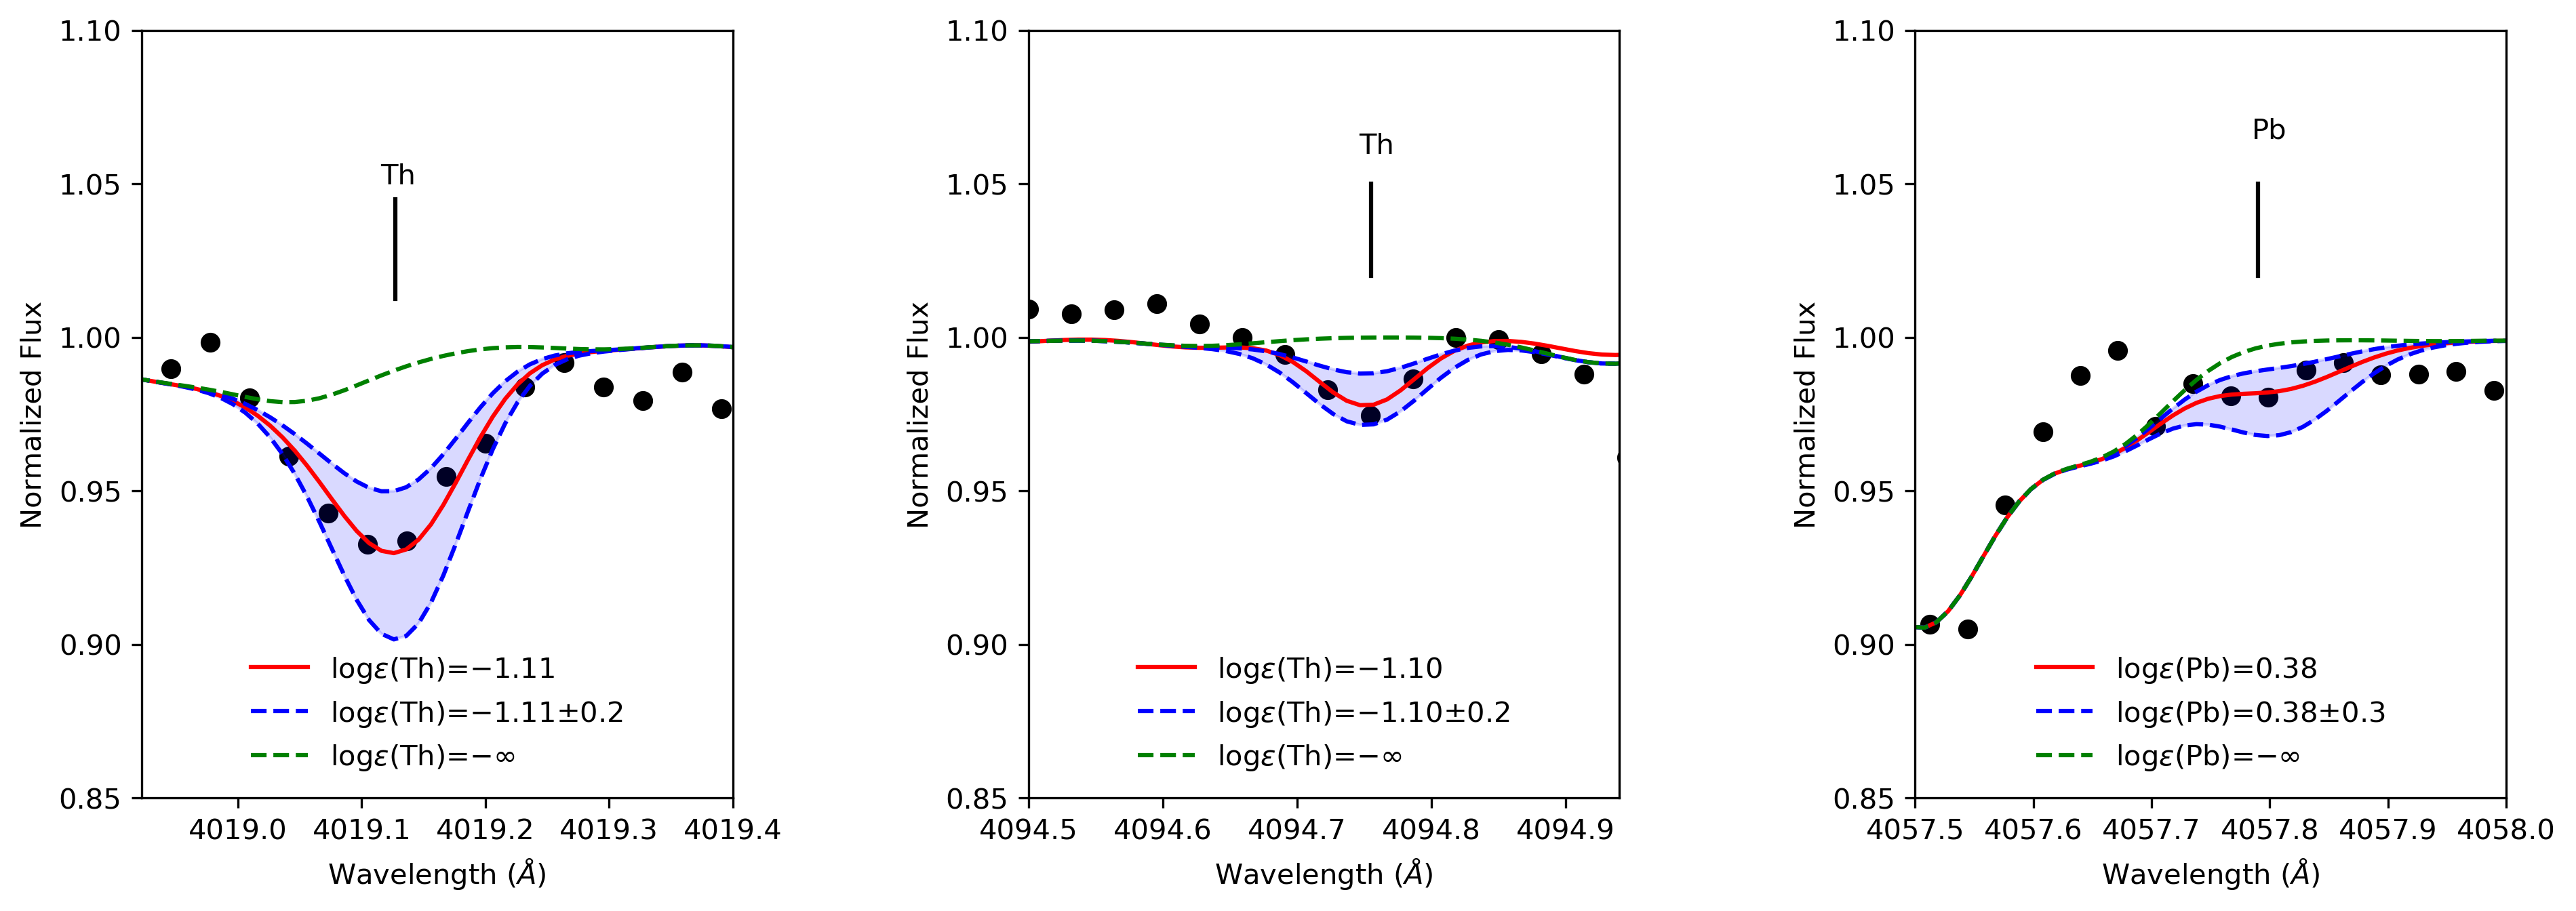

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15,5), dpi=300,
                        gridspec_kw={'hspace': 0.3, 'wspace': 0.5})

(ax1,ax2,ax3) = axs
#Th4019
waveobs=readfits_1dspec('th4019data.fits', log10=False)[0]
specobs=readfits_1dspec('th4019data.fits', log10=False)[1]
wavesynth=readfits_1dspec('th4019synth.fits', log10=False)[0]
specsynth=readfits_1dspec('th4019synth.fits', log10=False)[1]
plserrx=readfits_1dspec('th4019+error.fits', log10=False)[0]
plserry=readfits_1dspec('th4019+error.fits', log10=False)[1]
minerrx=readfits_1dspec('th4019-error.fits', log10=False)[0]
minerry=readfits_1dspec('th4019-error.fits', log10=False)[1]
continuumx=readfits_1dspec('th4019-inf.fits', log10=False)[0]
continuumy=readfits_1dspec('th4019-inf.fits', log10=False)[1]

ax1.scatter(waveobs,specobs,color='black')
ax1.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Th)=$-$1.11")
ax1.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Th)=$-$1.11$\pm0.2$")
ax1.plot(minerrx,minerry,'b--')
ax1.plot(continuumx,continuumy,'g--',label=r"$\log\epsilon$(Th)=$-\infty$")
ax1.ticklabel_format(useOffset=False)
ax1.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)
ax1.text(4019.115,1.05,'Th')
ax1.axvline(4019.127,0.65,0.78,color='black')
ax1.set_xlabel(r"Wavelength $(\AA)$")
ax1.set_ylabel('Normalized Flux')
#og: ax1.set_xlim(4018.95,4019.3)
ax1.set_xlim(4018.922,4019.4)
ax1.set_ylim(0.85,1.1)
ax1.legend(loc='lower center', frameon=False)

#Th4094
waveobs=readfits_1dspec('th4094data.fits', log10=False)[0]
specobs=readfits_1dspec('th4094data.fits', log10=False)[1]
wavesynth=readfits_1dspec('th4094synth.fits', log10=False)[0]
specsynth=readfits_1dspec('th4094synth.fits', log10=False)[1]
plserrx=readfits_1dspec('th4094+error.fits', log10=False)[0]
plserry=readfits_1dspec('th4094+error.fits', log10=False)[1]
minerrx=readfits_1dspec('th4094-error.fits', log10=False)[0]
minerry=readfits_1dspec('th4094-error.fits', log10=False)[1]
continuumx=readfits_1dspec('th4094-inf.fits', log10=False)[0]
continuumy=readfits_1dspec('th4094-inf.fits', log10=False)[1]

ax2.scatter(waveobs,specobs,color='black')
ax2.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Th)=$-$1.10")
ax2.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Th)=$-$1.10$\pm0.2$")
ax2.plot(minerrx,minerry,'b--')
ax2.plot(continuumx,continuumy,'g--',label=r"$\log\epsilon$(Th)=$-\infty$")
ax2.ticklabel_format(useOffset=False)
ax2.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)
ax2.set_xlabel(r"Wavelength $(\AA)$")
ax2.set_ylabel('Normalized Flux')
ax2.text(4094.746,1.06,'Th')
ax2.axvline(4094.755,0.68,0.8,color='black')
#og: ax2.set_xlim(4094.6,4094.9)
ax2.set_xlim(4094.5,4094.94)
ax2.set_ylim(0.85,1.1)
ax2.legend(loc='lower center', frameon=False)

#Pb4057
waveobs=readfits_1dspec('pb4057data.fits', log10=False)[0]
specobs=readfits_1dspec('pb4057data.fits', log10=False)[1]
wavesynth=readfits_1dspec('pb4057syn.fits', log10=False)[0]
specsynth=readfits_1dspec('pb4057syn.fits', log10=False)[1]
plserrx=readfits_1dspec('pb4057+err.fits', log10=False)[0]
plserry=readfits_1dspec('pb4057+err.fits', log10=False)[1]
minerrx=readfits_1dspec('pb4057-error.fits', log10=False)[0]
minerry=readfits_1dspec('pb4057-error.fits', log10=False)[1]
continuumx=readfits_1dspec('pb4057-inf.fits', log10=False)[0]
continuumy=readfits_1dspec('pb4057-inf.fits', log10=False)[1]

ax3.scatter(waveobs,specobs,color='black')
ax3.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Pb)=$0.38$")
ax3.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Pb)=0.38$\pm0.3$")
ax3.plot(minerrx,minerry,'b--')
ax3.plot(continuumx,continuumy,'g--',label=r"$\log\epsilon$(Pb)=$-\infty$")
ax3.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)
ax3.text(4057.785,1.065,'Pb')
ax3.axvline(4057.79,0.68,0.8,color='black')
#ax3.set_xlim(4057.68,4057.9)
ax3.set_xlim(4057.5,4058)
ax3.set_ylim(0.85,1.1)
ax3.ticklabel_format(useOffset=False)
ax3.legend(loc='lower center', frameon=False)
ax3.set_xlabel(r"Wavelength $(\AA)$")
ax3.set_ylabel('Normalized Flux')

#fig.savefig('rprocspectra2.png', dpi=300)

## R-proc pattern plot

In [18]:
Z=[]
Z_r=[]
sabun_s=[] #solar abundances for s-process
sabun_r=[] #solar abundances for r-process
N_h=2.898*(10**10)

Z_a=31 #atomic number of element
ga_s=[11.137,10.413]#N for s-process
ga_r=[11.6,4.7] #N for r-process

N_a_s=sum(ga_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(ga_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Ge
Z_a=32 #atomic number of element
ge_s=[15.0,18.323,3.531,15.733,0.0]#N for s-process
ge_r=[0.0,14.0,5.67,27.3,9.2] #N for r-process

N_a_s=sum(ge_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(ge_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#As
Z_a=33 #atomic number of element
as_s=[1.456]#N for s-process
as_r=[5.33] #N for r-process

N_a_s=sum(as_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(as_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Se
Z_a=34 #atomic number of element
se_s=[4.656,1.679,7.403,7.446,0.0]#N for s-process
se_r=[0.0,3.04,7.210,24.3,5.71] #N for r-process

N_a_s=sum(se_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(se_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Br
Z_a=35 #atomic number of element
br_s=[0.45,0.479]#N for s-process
br_r=[0.0,4.64] #N for r-process

N_a_s=sum(br_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(br_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Kr
Z_a=36 #atomic number of element
kr_s=[1.021,6.207,1.989,10.575,9.481]#N for s-process
kr_r=[0,0,3.750,18,0.93] #N for r-process

N_a_s=sum(kr_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(kr_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Rb
Z_a=37 #atomic number of element
rb_s=[0.69,2.14]#N for s-process
rb_r=[2.79,0.1] #N for r-process

N_a_s=sum(rb_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(rb_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Sr
Z_a=38 #atomic number of element
sr_s=[2.11,1.443,16.986]#N for s-process
sr_r=[0,0,2.5] #N for r-process

N_a_s=sum(sr_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(sr_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Y
Z_a=39 #atomic number of element
y_s=[3.344]#N for s-process
y_r=[1.31] #N for r-process

N_a_s=sum(y_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(y_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Zr
Z_a=40 #atomic number of element
zr_s=[4.529,1.158,1.289,1.687,0]#N for s-process
zr_r=[0.99,0.4,0.54,0.17,0.3] #N for r-process

N_a_s=sum(zr_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(zr_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Nb
Z_a=41 #atomic number of element
nb_s=[0.229]#N for s-process
nb_r=[0.11] #N for r-process

N_a_s=sum(nb_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(nb_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Mo
Z_a=42 #atomic number of element
mo_s=[0.189,0.475,0.156,0.514,0]#N for s-process
mo_r=[0.213,0,0.087,0.093,0.242] #N for r-process

N_a_s=sum(mo_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(mo_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Ru
Z_a=44 #atomic number of element
ru_s=[0.49,0.242,0.05,0.261,0]#N for s-process
ru_r=[0,0,0.266,0.327,0.348] #N for r-process

N_a_s=sum(ru_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(ru_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Rh
Z_a=45 #atomic number of element
rh_s=[0.055]#N for s-process
rh_r=[0.289] #N for r-process

N_a_s=sum(rh_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(rh_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Pd
Z_a=46 #atomic number of element
pd_s=[0.165,0.4,0.186,0.226,0]#N for s-process
pd_r=[0,0.269,0.193,0.145,0.163] #N for r-process

N_a_s=sum(pd_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(pd_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Ag
Z_a=47 #atomic number of element
ag_s=[0.058,0.059]#N for s-process
ag_r=[0.239,0.196] #N for r-process

N_a_s=sum(ag_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(ag_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Cd
Z_a=48 #atomic number of element
cd_s=[0.178,0.042,0.198,0.06,0.287,0]#N for s-process
cd_r=[0,0.165,0.196,0.139,0.14,0.121] #N for r-process

N_a_s=sum(cd_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(cd_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#In
Z_a=49 #atomic number of element
in_s=[0.057]#N for s-process
in_r=[0.121] #N for r-process

N_a_s=sum(in_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(in_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Sn
Z_a=50 #atomic number of element
sn_s=[0.511,0.146,0.706,0.155,1.099,0,0]#N for s-process
sn_r=[0,0.128,0.137,0.065,0.078,0.154,0.199] #N for r-process

N_a_s=sum(sn_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(sn_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Sb
Z_a=51 #atomic number of element
sb_s=[0.047,0]#N for s-process
sb_r=[0.113,0.132] #N for r-process

N_a_s=sum(sb_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(sb_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Te
Z_a=52 #atomic number of element
te_s=[0.133,0.047,0.248,0.088,0.450,0,0]#N for s-process
te_r=[0,0,0,0.267,0.525,1.526,1.634] #N for r-process

N_a_s=sum(te_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(te_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#I
Z_a=53 #atomic number of element
i_s=[0.057]#N for s-process
i_r=[0.121] #N for r-process

N_a_s=sum(i_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(i_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Xe
Z_a=54 #atomic number of element
xe_s=[0.126,0.066,0.199,0.087,0.498,0]#N for s-process
xe_r=[0,1.24,0,0.954,0.8,0.449] #N for r-process

N_a_s=sum(xe_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(xe_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Cs
Z_a=55 #atomic number of element
cs_s=[0.056]#N for s-process
cs_r=[0.315] #N for r-process

N_a_s=sum(cs_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(cs_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Ba
Z_a=56 #atomic number of element
ba_s=[0.178,0.068,0.5,0.372,3.546]#N for s-process
ba_r=[0,0.298,0,0.283,0.225] #N for r-process

N_a_s=sum(ba_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(ba_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#La
Z_a=57 #atomic number of element
la_s=[0.337]#N for s-process
la_r=[0.110] #N for r-process

N_a_s=sum(la_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(la_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Ce
Z_a=58 #atomic number of element
ce_s=[0.894,0]#N for s-process
ce_r=[0.089,0.115] #N for r-process

N_a_s=sum(ce_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(ce_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Pr
Z_a=59 #atomic number of element
pr_s=[0.079]#N for s-process
pr_r=[0.082] #N for r-process

N_a_s=sum(pr_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(pr_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Nd
Z_a=60 #atomic number of element
nd_s=[0.227,0.037,0.105,0.02,0.091,0.004,0]#N for s-process
nd_r=[0,0.065,0.094,0.049,0.053,0.044,0.047] #N for r-process

N_a_s=sum(nd_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(nd_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Sm
Z_a=62 #atomic number of element
sm_s=[0.003,0.038,0.005,0.022,0.018,0]#N for s-process
sm_r=[0.031,0,0.031,0,0.053,0.059] #N for r-process

N_a_s=sum(sm_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(sm_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Eu
Z_a=63 #atomic number of element
eu_s=[0,0.002]#N for s-process
eu_r=[0.042,0.048] #N for r-process

N_a_s=sum(eu_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(eu_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Gd
Z_a=64 #atomic number of element
gd_s=[0.001,0.009,0.003,0.015,0.007,0.027,0]#N for s-process
gd_r=[0,0,0.045,0.055,0.046,0.058,0.072,0.06] #N for r-process

N_a_s=sum(gd_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(gd_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Tb
Z_a=65 #atomic number of element
tb_s=[0.004]#N for s-process
tb_r=[0.060] #N for r-process

N_a_s=sum(tb_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(tb_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Dy
Z_a=66 #atomic number of element
dy_s=[0.009,0.004,0.016,0.002,0.018]#N for s-process
dy_r=[0,0.075,0.101,0.093,0.091] #N for r-process

N_a_s=sum(dy_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(dy_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Ho
Z_a=67 #atomic number of element
ho_s=[0.006]#N for s-process
ho_r=[0.083] #N for r-process

N_a_s=sum(ho_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(ho_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Er
Z_a=68 #atomic number of element
er_s=[0.004,0.012,0.005,0.020,0.001]#N for s-process
er_r=[0,0.072,0.053,0.047,0.037] #N for r-process

N_a_s=sum(er_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(er_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Tm
Z_a=69 #atomic number of element
tm_s=[0.006]#N for s-process
tm_r=[0.031] #N for r-process

N_a_s=sum(tm_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(tm_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Yb
Z_a=70 #atomic number of element
dy_s=[0.006,0.004,0.017,0.008,0.040,0]#N for s-process
dy_r=[0,0.029,0.036,0.031,0.037,0.03] #N for r-process

N_a_s=sum(dy_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(dy_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Lu
Z_a=71 #atomic number of element
lu_s=[0.006,0.002]#N for s-process
lu_r=[0.031,0] #N for r-process

N_a_s=sum(lu_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(lu_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Hf
Z_a=72 #atomic number of element
hf_s=[0.008,0.005,0.021,0.007,0.035]#N for s-process
hf_r=[0,0.024,0.022,0.015,0.02] #N for r-process

N_a_s=sum(hf_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(hf_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Ta
Z_a=73 #atomic number of element
ta_s=[0.009]#N for s-process
ta_r=[0.013] #N for r-process

N_a_s=sum(ta_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(ta_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#W
Z_a=74 #atomic number of element
w_s=[0.024,0.013,0.029,0.006]#N for s-process
w_r=[0.012,0.007,0.013,0.031] #N for r-process

N_a_s=sum(w_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(w_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Re
Z_a=75 #atomic number of element
re_s=[0.004,0.001]#N for s-process
re_r=[0.014,0.033] #N for r-process

N_a_s=sum(re_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(re_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Os
Z_a=76 #atomic number of element
os_s=[0.012,0.006,0.016,0.004,0.021,0.001]#N for s-process
os_r=[0,0,0.079,0.111,0.168,0.293] #N for r-process

N_a_s=sum(os_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(os_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Ir
Z_a=77 #atomic number of element
ir_s=[0.006,0.003]#N for s-process
ir_r=[0.241,0.408] #N for r-process

N_a_s=sum(ir_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(ir_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Pt
Z_a=78 #atomic number of element
pt_s=[0.01,0.02,0.006,0.035,0]#N for s-process
pt_r=[0,0.431,0.457,0.312,0.099] #N for r-process

N_a_s=sum(pt_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(pt_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Au
Z_a=79 #atomic number of element
au_s=[0.01]#N for s-process
au_r=[0.176] #N for r-process

N_a_s=sum(au_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(au_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Hg
Z_a=80 #atomic number of element
hg_s=[0.035,0.016,0.051,0.02,0.079,0]#N for s-process
hg_r=[0,0.043,0.030,0.027,0.026,0.02] #N for r-process

N_a_s=sum(hg_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(hg_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Tl
Z_a=81 #atomic number of element
tl_s=[0.042,0.06]#N for s-process
tl_r=[0.012,0.041] #N for r-process

N_a_s=sum(tl_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(tl_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Pb
Z_a=82 #atomic number of element
pb_s=[0.051,0.326,0.313,1.587]#N for s-process
pb_r=[0,0.223,0.28,0.118] #N for r-process

N_a_s=sum(pb_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(pb_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Bi
Z_a=83 #atomic number of element
bi_s=[0.051]#N for s-process
bi_r=[0.093] #N for r-process

N_a_s=sum(bi_s) #finding N_a for s-proc
x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
sabun_s.append(x_s) 
N_a_r=sum(bi_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
Z.append(Z_a)
Z_r.append(Z_a)

#Th
Z_a=90 #atomic number of element
#th_s=[0.000000000001]#N for s-process
th_r=[0.042] #N for r-process

#N_a_s=sum(th_s) #finding N_a for s-proc
#x_s=np.log10(N_a_s/N_h)+12 #log_eps(A) for s-process
#sabun_s.append(x_s) 
N_a_r=sum(th_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
#Z.append(Z_a)
Z_r.append(Z_a)

#U
Z_a=92 #atomic number of element
#u_s=[0.000000000001,0]#N for s-process
u_r=[0.006,0.02] #N for r-process

N_a_r=sum(u_r) #finding N_a for r-proc
x_r=np.log10(N_a_r/N_h)+12 #log_eps(A) for r-proc
sabun_r.append(x_r)
#Z.append(Z_a)
Z_r.append(Z_a)

In [19]:
AN=[38,39,40,44,46,47,56,57,58,59,60,62,63,64,65,66,67,68,69,70,72,76,77,82,90]
abun=[0.485,-0.141,0.556,-0.37,0.15,-0.38,0.42,-0.39,-0.07,-0.786,0.05,-0.36,-0.598,0.2,-0.57,0.16,-0.822,-0.13,-0.94,-0.23,-0.52,0.13,0.43,0.38,-1.105]

sc_r= [x - 1.09 for x in sabun_r]
sc_s= [x - 1.76 for x in sabun_s]

In [20]:
arrow = u'$\u2193$'

upperx= [44,46,70,76,77]
upper= [-0.37,0.15,-0.23,0.13,0.43]

uppery= [x - 0.2 for x in upper]

In [21]:
arl_AN=[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 90]
arl_abun=[4.1856351946, 4.55607365449, 3.02000337158, 3.6231278536, 2.2795483747, 3.29951837697, 2.49904139232, 3.15848501888, 2.41209460269, 2.04609125906, 1.11308998699, 1.81044892138, 0.636091259056, 1.57897000434, 1.58250891271, 1.75, 1.30239375982, 0.843089986992, 1.39124123738, 0.612913356643, 1.58406804435, 0.885061263392, 2.09907809238, 1.526349979, 2.15907809238, 1.00941892571, 1.45875360095, 0.679783596617, 0.941727836018, 0.427570176098, 1.06345267649, 0.811258348719, 0.494050902793, 0.999418925714, 0.267547976219, 1.02941892571, 0.444730921054, 0.839078092376, 0.0395192526186, 0.666074802701, 0.00308998699194, 0.493452676486, -0.349147988358, 0.493452676486, 0.219518376973, 1.35712819768, 1.37387691494, 1.59726621243, 0.894050902793, 0.761064607026, 0.280211241712, 1.48239375982, 0.628180516937, 0.02]

sc_r_arl= [x - 1.11 for x in arl_abun]

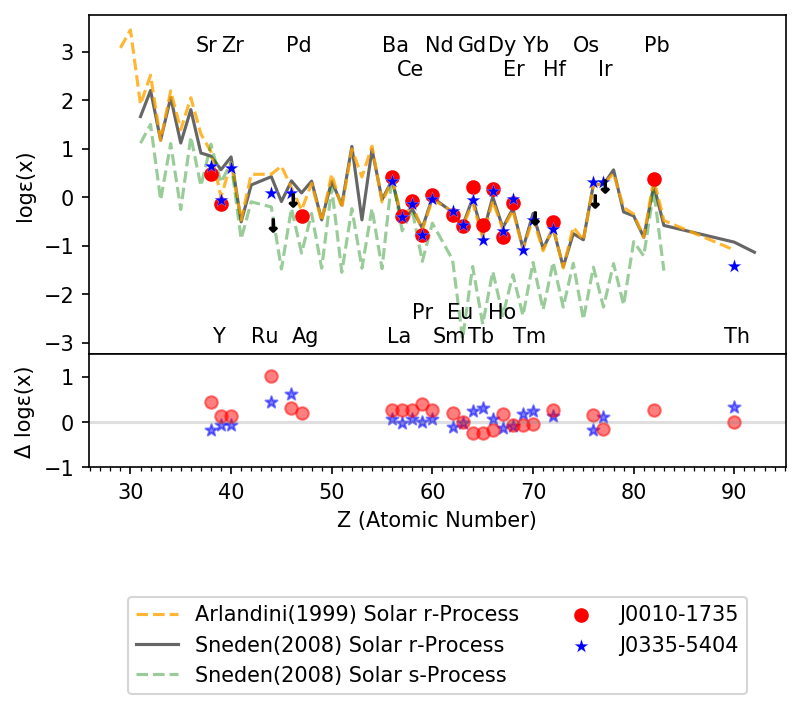

In [22]:
#With Ret II Star
hecompabund=[0.485,-0.11,0.556,0.53,0.71,0.416,-0.427,-0.074,-0.786,0.029,-0.388,-0.598,0.2,-0.57,0.19,-0.822,-0.13,-0.907,-0.23,-0.52,0.13,0.43,-1.105]
schecompabund= [x - 1.09 for x in hecompabund]
retabun=0.45,-0.25,0.41,-0.12,-0.12,0.14,-0.62,-0.34,-0.98,-0.24,-0.49,-0.77,-0.25,-1.08,-0.08,-0.89,-0.24,-1.29,-0.67,-0.85,0.11,0.12,-1.63
retAN=[38,39,40,44,46,56,57,58,59,60,62,63,64,65,66,67,68,69,70,72,76,77,90]
EW=[0.485,-0.141,0.556,-0.37,0.15,-0.38,0.42,-0.39,-0.07,-0.786,0.05,-0.36,-0.598,0.2,-0.57,0.16,-0.822,-0.13,-0.94,-0.23,-0.52,0.13,0.43,0.38,-1.105]

AN=[38,39,40,44,46,47,56,57,58,59,60,62,63,64,65,66,67,68,69,70,72,76,77,82,90]
abun=[0.485,-0.141,0.556,-0.37,0.15,-0.38,0.42,-0.39,-0.07,-0.786,0.05,-0.36,-0.598,0.2,-0.57,0.16,-0.822,-0.13,-0.94,-0.23,-0.52,0.13,0.43,0.38,-1.105]

fig, axs = plt.subplots(2, sharex=True, sharey=False,dpi=150, gridspec_kw={'hspace': 0, 'height_ratios': [3, 1]})
axs[0].plot(arl_AN, sc_r_arl, 'orange',linestyle='--',alpha=0.8,label='Arlandini(1999) Solar r-Process',zorder=2)
axs[0].plot(Z_r,sc_r,color='black',alpha=0.6,label='Sneden(2008) Solar r-Process',zorder=1)
axs[0].plot(Z, sc_s, 'green',linestyle='--', alpha=0.4, label='Sneden(2008) Solar s-Process')
#axs[0].scatter(AN,abun,color='red', label='J0010-1735',zorder=3)
axs[0].scatter(AN[0:2],abun[0:2],color='red', label='J0010-1735',zorder=3)
axs[0].scatter(AN[5:18],abun[5:18],color='red', zorder=3)
axs[0].scatter(AN[20],abun[20],color='red', zorder=3)
axs[0].scatter(AN[23:24],abun[23:24],color='red', zorder=3)
axs[0].annotate("Sr",(36.5,3))
axs[0].annotate("Y",(38.25,-3))
axs[0].annotate("Zr",(39,3))
axs[0].annotate("Ru",(42,-3))
axs[0].annotate("Pd",(45.5,3))
axs[0].annotate("Ag",(46,-3))
axs[0].annotate("Ba",(55,3))
axs[0].annotate("La",(55.5,-3))
axs[0].annotate("Ce",(56.5,2.5))
axs[0].annotate("Pr",(58,-2.5))
axs[0].annotate("Nd",(59.3,3))
axs[0].annotate("Sm",(60,-3))
axs[0].annotate("Eu",(61.5,-2.5))
axs[0].annotate("Gd",(62.5,3))
axs[0].annotate("Tb",(63.5,-3))
axs[0].annotate("Dy",(65.5,3))
axs[0].annotate("Ho",(65.5,-2.5))
axs[0].annotate("Er",(67,2.5))
axs[0].annotate("Tm",(68,-3))
axs[0].annotate("Yb",(69,3))
axs[0].annotate("Hf",(71,2.5))
axs[0].annotate("Os",(74,3))
axs[0].annotate("Ir",(76.5,2.5))
axs[0].annotate("Pb",(81,3))
axs[0].annotate("Th",(89,-3))

#scaling the ret ii star
eusolar= 0.495
euretii= -0.79
euhe= -0.59
scale= euhe-euretii
scretabun= [x + scale for x in retabun]
axs[0].scatter(retAN,scretabun, marker='*', color='blue',linewidth=0.1,edgecolor='w',s=50, label="J0335-5404",zorder=3)
yerror=[0.07,0.167,0.104,0,0,0,0.0902,0.085,0.054,0.123,0.107,0.045,0.091,0.074,0,0.066,0.078,0.043,0.047,0,0,0,0,0,0.01]
axs[0].scatter(upperx, uppery, color='black', marker=arrow,zorder=4) 

#calculating the residuals
retdifference=np.subtract(hecompabund,scretabun)
solarsameabund=[2.046,1.113,1.81,1.75,1.57,0.94,1.8,1,1.3,0.72,1.42,0.96,0.52,1.07,0.3,1.1,0.48,0.92,0.1,0.84,0.85,1.4,1.38,1.75,0.02]
scsolarsame= [x - 1.11 for x in solarsameabund]
hedifference=np.subtract(scsolarsame,EW)

axs[1].axhline(y=0, color='grey', alpha=0.25)
axs[1].scatter(retAN,retdifference,color='blue', marker='*', alpha=0.5)
axs[1].scatter(AN,hedifference,color='red', alpha=0.5)


axs[1].set(ylim=(-1,1.5))
axs[1].xaxis.set_minor_locator(MultipleLocator(1))

axs[0].set(ylabel='logε(x)')
axs[1].set(ylabel='Δ logε(x)')
axs[1].set(xlabel='Z (Atomic Number)')
axs[0].legend(bbox_to_anchor=(0.5, -1), loc='lower center', borderaxespad=0.,ncol=2)


# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

## Abundance Plot

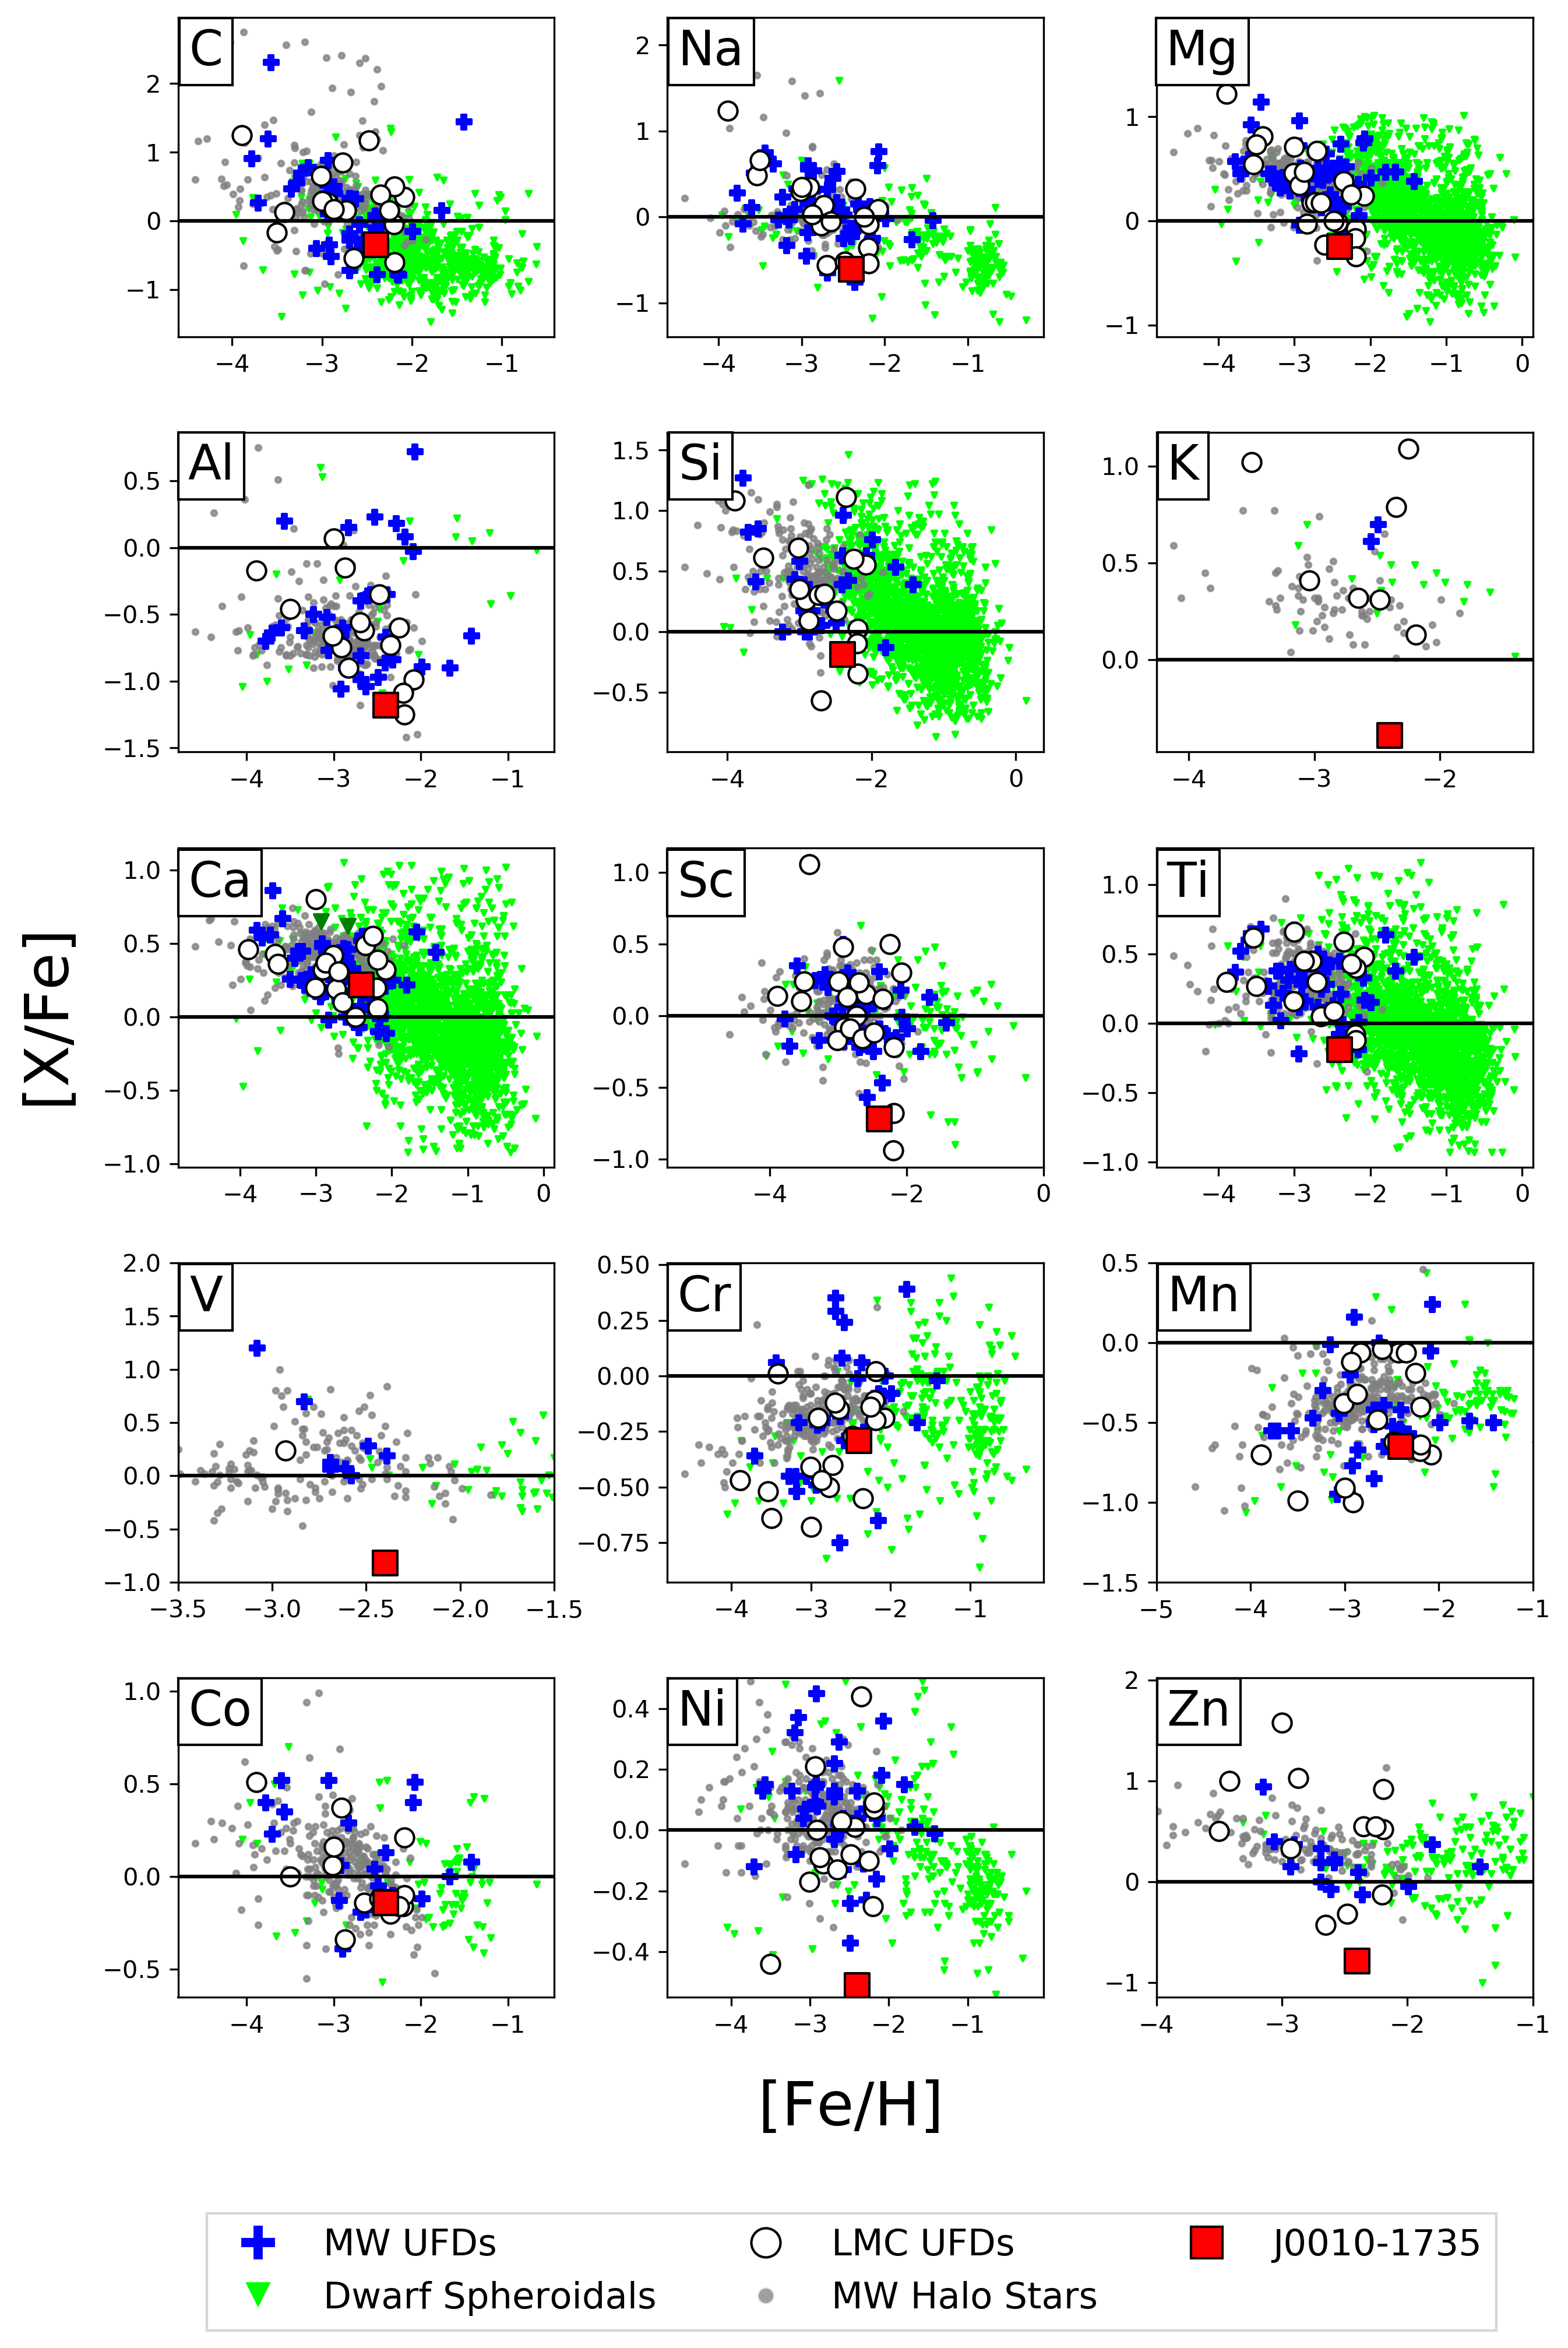

In [2]:
fig, axs = plt.subplots(5, 3, figsize=(10,15), dpi=300,
                        gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

(ax1, ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15) = axs
fig.text(0.51, 0.0825, '[Fe/H]', ha='center', va='center',fontsize=25)
fig.text(0.05, 0.5, '[X/Fe]', ha='center', va='center', rotation='vertical',fontsize=25)
He=-2.4

#ax1 Carbon
data = np.genfromtxt("ctableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ax1.scatter(data['e'], data['f'], color='grey',s=5, alpha=0.75)
ax1.axhline(y=0, color='black',zorder=1)
booiix =[-2.86,-2.87,-2.63,-2.92]
booiiy =[0.4,0.5,0.32,0.4]
ax1.scatter(booiix,booiiy, color='b',marker='P')
umax=[-3.15,-3.28,-2.39]
umay=[0.78,0.55,-0.78]
ax1.scatter(umax,umay, color='b',marker='P')
comx=[-2.36,-2.93,-2.58]
comy=[0.02,0.1,-0.43]
ax1.scatter(comx,comy, color='b',marker='P')
booix=[-3.71,-3.06,-2.16,-2.15,-1.99]
booiy=[0.26,-0.4,-0.77,-0.79,-0.15]
ax1.scatter(booix,booiy, color='b',marker='P')
herx=[-2.53]
hery=[-0.27]
ax1.scatter(herx,hery, color='b',marker='P')
grusx=[-2.49,-2.69,-2.94]
grusy=[-0.33,-0.72,0.52]
ax1.scatter(grusx,grusy, color='b',marker='P')
tuciiix=[-2.61,-2.69,-2.69,-2.58]
tuciiiy=[-0.43,-0.28,-0.19,-0.05]
ax1.scatter(tuciiix,tuciiiy, color='b',marker='P')
tuciix=[-2.93,-2.92,-2.41,-3.23,-2.69,-3.0,-3.34]
tuciiy=[0.88,-0.35,0.08,0.7,0.33,0.32,0.47]
ax1.scatter(tuciix,tuciiy, color='b',marker='P')
segix=[-1.42,-1.67,-2.32,-2.4,-3.6,-3.78,-3.57]
segiy=[1.44,0.15,0.08,-0.1,1.2,0.91,2.31]
ax1.scatter(segix,segiy, color='b',marker='P')
segiix=[-2.9]
segiiy=[-0.52]
ax1.scatter(segiix,segiiy,color='b',marker='P')
ax1.scatter(He,-0.35, color='red', marker='s',s=100,edgecolors='black',zorder=2)
#LMC UFDS
retx=[-2.91,-2.77,-2.08,-3.01,-3.42,-2.73,-2.19,-2.93]
rety=[0.2,0.85,0.35,0.65,0.13,0.15,0.5,0.26]
ax1.scatter(retx,rety, color='white',s=60, edgecolors='black')
cariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.48]
cariiy=[-0.05,-0.6,0.38,0.29,-0.17,-0.54,0.17,1.17]
cariiix=[-3.89,-2.25]
cariiiy=[1.25,0.15]
ax1.scatter(cariix,cariiy,color='white',s=60, edgecolors='black')
ax1.scatter(cariiix,cariiiy,color='white',s=60, edgecolors='black')
data = np.genfromtxt("c_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax1.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)
fig.text(0.141, 0.867, 'C', fontsize=20,ha='center', va='center',bbox=dict(facecolor='white', alpha=1))

#Ax2 Sodium
    #MW UFDS
data = np.genfromtxt("natableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ax2.scatter(data['e'], data['f'], color='grey',s=5, alpha=0.75)
ax2.axhline(y=0, color='black',zorder=1)
booiix =[-2.86,-2.87,-2.63,-2.92]
booiiy =[0.54,0.3,0.45,0.6]
ax2.scatter(booiix,booiiy, color='b',marker='P')
umax=[-3.15,-3.28,-2.39]
umay=[-0.03,-0.03,-0.17]
ax2.scatter(umax,umay, color='b',marker='P')
comx=[-2.36,-2.93,-2.58]
comy=[-0.76,-0.18,0.17]
ax2.scatter(comx,comy, color='b',marker='P')
booix=[-3.71,-3.06,-2.64,-2.16,-3.44,-2.15,-2.28,-1.99,-3.18,-2.49]
booiy=[-0.08,0.33,0.01,-0.28,0.75,-0.25,0.08,-0.02,-0.33,-0.25]
ax2.scatter(booix,booiy, color='b',marker='P')
herx=[-2.07,-2.09,-2.52,-2.83,-2.53,-2.28]
hery=[0.76,0.6,0.08,0.09,0.07,-0.08]
ax2.scatter(herx,hery, color='b',marker='P')
leox=[-3.19,-2.88,-2.18]
leoy=[0.01,0.17,0.12]
ax2.scatter(leox,leoy,color='b',marker='P')
cvnx=[-2.49]
cvny=[0.02]
ax2.scatter(cvnx,cvny,color='b',marker='P')
grusx=[-2.49,-2.69,-2.94]
grusy=[0.02,0.1,-0.45]
ax2.scatter(grusx,grusy, color='b',marker='P')
tuciiix=[-2.69,-2.58]
tuciiiy=[0.32,0.53]
ax2.scatter(tuciiix,tuciiiy, color='b',marker='P')
tuciix=[-2.93,-2.92,-2.41,-3.23,-2.69,-3.08,-3.34]
tuciiy=[0.15,0.56,-0.13,0.23,-0.65,0.09,0.62]
ax2.scatter(tuciix,tuciiy, color='b',marker='P')
segix=[-1.42,-1.67,-2.32,-2.4,-3.6,-3.78,-3.57]
segiy=[-0.04,-0.26,0.15,-0.23,0.11,0.28,0.51]
ax2.scatter(segix,segiy, color='b',marker='P')
segiix=[-2.9]
segiiy=[0.16]
ax2.scatter(segiix,segiiy, color='b',marker='P')
    #LMC UFDS
retx=[-2.91,-2.77,-2.08,-3.01,-2.73,-2.19,-3.54]
rety=[0.35,-0.1,0.09,0.3,0.14,-0.09,0.48]
ax2.scatter(retx,rety, color='white',s=60, edgecolors='black')
cariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.7,-2.48]
cariiy=[-0.36,-0.54,0.33,0.35,0.66,-0.05,0.03,-0.56,-0.52]
cariiix=[-3.89,-2.25]
cariiiy=[1.239,0]
ax2.scatter(cariix,cariiy,color='white',s=60, edgecolors='black')
ax2.scatter(cariiix,cariiiy,color='white',s=60, edgecolors='black')
    #Dsphs
data = np.genfromtxt("na_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax2.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)
ax2.scatter(He,-0.61, color='red', marker='s',s=100,edgecolors='black',zorder=2)
fig.text(0.43, 0.867, 'Na',fontsize=20, ha='center', va='center',bbox=dict(facecolor='white', alpha=1))

#Ax3 Magnesium
    #MW UFDs
data = np.genfromtxt("mgtableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ax3.scatter(data['e'], data['f'], color='grey',s=5, alpha=0.75)
ax3.axhline(y=0, color='black',zorder=1)
booiix =[-2.86,-2.87,-2.63,-2.92]
booiiy =[0.42,0.26,0.39,0.42]
ax3.scatter(booiix,booiiy, color='b',marker='P')
umax=[-3.15,-3.28,-2.39]
umay=[0.42,0.45,0.74]
ax3.scatter(umax,umay,color='b',marker='P')
comx=[-2.36,-2.93,-2.58]
comy=[0.14,0.96,0.48]
ax3.scatter(comx,comy,color='b',marker='P')
booix=[-3.71,-3.06,-2.33,-2.64,-2.16,-3.44,-2.15,-2.28,-1.99,-1.8,-3.18,-2.49]
booiy=[0.45,0.29,0.41,0.13,0.35,1.14,0.05,0.34,0.41,0.47,0.39,0.2]
ax3.scatter(booix,booiy, color='b',marker='P')
herx=[-2.07,-2.09,-2.52,-2.83,-2.53,-2.28]
hery=[0.79,0.75,0.19,0.3,0.25,-0.1]
ax3.scatter(herx,hery, color='b',marker='P')
leox=[-3.19,-2.88,-2.18]
leoy=[0.32,0.4,-0.1]
ax3.scatter(leox,leoy,color='b',marker='P')
cvniix=[-2.49]
cvniiy=[0.12]
ax3.scatter(cvniix,cvniiy,color='b',marker='P')
cvnix=[-2.18,-2.52]
cvniy=[-0.04,0.46]
ax3.scatter(cvnix,cvniy,color='b',marker='P')
grusx=[-2.49,-2.69,-2.94]
grusy=[0.51,0.44,0.72]
ax3.scatter(grusx,grusy, color='b',marker='P')
tuciiix=[-2.61,-2.69,-2.69,-2.58]
tuciiiy=[0.45,0.5,0.4,0.64]
ax3.scatter(tuciiix,tuciiiy, color='b',marker='P')
tuciix=[-2.93,-2.92,-2.41,-3.23,-2.69,-3.08,-3.34]
tuciiy=[-0.04,0.51,0.16,0.36,0.42,0.38,0.45]
ax3.scatter(tuciix,tuciiy, color='b',marker='P')
segix=[-1.42,-1.67,-2.32,-2.4,-3.6,-3.78,-3.57]
segiy=[0.38,0.47,0.52,0.54,0.59,0.57,0.92]
ax3.scatter(segix,segiy, color='b',marker='P')
segiix=[-2.9]
segiiy=[0.31]
ax3.scatter(segiix,segiiy, color='b',marker='P')
    #LMC UFDs
retx=[-2.91,-2.77,-2.08,-3.01,-3.42,-2.73,-2.19,-3.54,-2.93]
rety=[0.45,0.17,0.24,0.46,0.81,0.18,-0.08,0.54,0.34]
ax3.scatter(retx,rety, color='white',s=60, edgecolors='black')
horx=[-2.43,-2.6,-2.83]
hory=[-0.02,-0.23,-0.03]
ax3.scatter(horx,hory,color='white',s=60, edgecolors='black')
cariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.7,-2.48]
cariiy=[-0.17,-0.34,0.38,0.71,0.73,0.17,0.47,0.67,0]
cariiix=[-3.89,-2.25]
cariiiy=[1.22,0.25]
ax3.scatter(cariix,cariiy,color='white',s=60, edgecolors='black')
ax3.scatter(cariiix,cariiiy,color='white',s=60, edgecolors='black')
    #Dsphs
data = np.genfromtxt("mg_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax3.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)
ax3.scatter(-2.4,-0.25, color='red', marker='s',s=100,edgecolors='black',zorder=2)
fig.text(0.711, 0.867, 'Mg',fontsize=20, ha='center', va='center',bbox=dict(facecolor='white', alpha=1))

#Ax4 Aluminum
    #MW UFDS
data = np.genfromtxt("altableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ax4.scatter(data['e'], data['f'], color='grey',s=5, alpha=0.75)
ax4.axhline(y=0, color='black',zorder=1)
herx=[-2.07,-2.09,-2.83,-2.53,-2.28]
hery=[0.72,-0.03,0.15,0.23,0.18]
ax4.scatter(herx,hery, color='b',marker='P')
booiix =[-2.86,-2.63,-2.92]
booiiy =[-0.9,-1.04,-1.06]
ax4.scatter(booiix,booiiy, color='b',marker='P')
umax=[-2.39]
umay=[-0.35]
ax4.scatter(umax,umay, color='b',marker='P')
booix=[-3.71,-3.06,-1.99]
booiy=[-0.64,-0.77,-0.89]
ax4.scatter(booix,booiy, color='b',marker='P')
leox=[-2.18]
leoy=[0.08]
ax4.scatter(leox,leoy,color='b',marker='P')
grusx=[-2.49,-2.69]
grusy=[-0.97,-0.81]
ax4.scatter(grusx,grusy, color='b',marker='P')
tuciiix=[-2.61,-2.69,-2.58]
tuciiiy=[-0.36,-0.99,-0.35]
ax4.scatter(tuciiix,tuciiiy, color='b',marker='P')
tuciix=[-2.93,-2.92,-2.41,-3.23,-2.69,-3.08,-3.34]
tuciiy=[-0.69,-0.65,-0.86,-0.5,-0.4,-0.52,-0.62]
ax4.scatter(tuciix,tuciiy, color='b',marker='P')
segix=[-1.42,-1.67,-2.32,-2.4,-3.6,-3.78,-3.57]
segiy=[-0.66,-0.9,-0.84,-0.67,-0.6,-0.7,0.2]
ax4.scatter(segix,segiy, color='b',marker='P')
segiix=[-2.9]
segiiy=[-0.6]
ax4.scatter(segiix,segiiy, color='b',marker='P')
ax4.scatter(He,-1.18, color='red', marker='s',s=100,edgecolors='black',zorder=2)
    #LMC UFDs
cariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.7,-2.48]
cariiy=[-1.09,-1.25,-0.73,0.07,-0.46,-0.62,-0.15,-0.56,-0.35]
cariiix=[-3.89,-2.25]
cariiiy=[-0.17,-0.6]
horx=[-2.83]
hory=[-0.9]
retx=[-2.91,-2.08,-3.01]
rety=[-0.75,-0.99,-0.66]
ax4.scatter(retx,rety, color='white',s=60, edgecolors='black')
ax4.scatter(horx,hory,color='white',s=60, edgecolors='black')
ax4.scatter(cariix,cariiy,color='white',s=60, edgecolors='black')
ax4.scatter(cariiix,cariiiy,color='white',s=60, edgecolors='black')
    #Dsphs
data = np.genfromtxt("al_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax4.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)
fig.text(0.144, 0.709, 'Al',fontsize=20, ha='center', va='center',bbox=dict(facecolor='white', alpha=1))

#Ax5 Silicon
    #MW UFDs
data = np.genfromtxt("sitableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ax5.scatter(data['e'], data['f'], color='grey',s=5, alpha=0.75)
ax5.axhline(y=0, color='black',zorder=1)
herx=[-2.07]
hery=[0.63]
ax5.scatter(herx,hery, color='b',marker='P')
booiix =[-2.86,-2.92]
booiiy =[0,0]
ax5.scatter(booiix,booiiy, color='b',marker='P')
umax=[-2.39]
umay=[0.96]
ax5.scatter(umax,umay, color='b',marker='P')
booix=[-3.71,-3.06,-1.99,-1.8]
booiy=[0.82,0.43,0.76,-0.13]
ax5.scatter(booix,booiy, color='b',marker='P')
grusx=[-2.49,-2.69,-2.94]
grusy=[0.07,0.05,0.17]
ax5.scatter(grusx,grusy, color='b',marker='P')
horx=[-2.83]
hory=[0.17]
ax5.scatter(horx,hory,color='b',marker='P')
tuciix=[-3.0,-2.59]
tuciiy=[0.58,0.22]
tuciiix=[-2.93,-2.92,-2.41,-3.23]
tuciiiy=[0.39,0.18,0.39,0]
ax5.scatter(tuciiix,tuciiiy, color='b',marker='P')
ax5.scatter(tuciix,tuciiy, color='b',marker='P')
segix=[-1.42,-1.67,-2.32,-2.4,-3.6,-3.78,-3.57]
segiy=[0.39,0.53,0.42,0.63,0.41,1.27,0.85]
ax5.scatter(segix,segiy, color='b',marker='P')
segiix=[-2.9]
segiiy=[0.15]
ax5.scatter(segiix,segiiy, color='b',marker='P')
    #LMC UFDs
cariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.7,-2.48]
cariiy=[-0.10,-0.35,1.11,0.35,0.61,0.31,0.09,-0.57,0.17]
cariiix=[-3.89,-2.25]
cariiiy=[1.08,0.60]
retx=[-2.91,-2.08,-3.01,-2.73,-2.19]
rety=[0.26,0.55,0.69,0.3,0.02]
ax5.scatter(retx,rety, color='white', s=60,edgecolors='black')
ax5.scatter(cariix,cariiy,color='white', s=60,edgecolors='black')
ax5.scatter(cariiix,cariiiy,color='white', s=60,edgecolors='black')
ax5.scatter(He,-0.19, color='red', marker='s',s=100,edgecolors='black',zorder=2)
    #Dsphs
data = np.genfromtxt("si_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax5.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)
fig.text(0.424, 0.709, 'Si',fontsize=20, ha='center', va='center',bbox=dict(facecolor='white', alpha=1))

#Ax6 Potassium
    #MW UFDs
data = np.genfromtxt("khalo.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ax6.scatter(data['e'], data['f'], color='grey',s=5, alpha=0.75)
ax6.axhline(y=0, color='black',zorder=1)
data = np.genfromtxt("kgrus.csv", delimiter=",", names=["a", "b"])
ax6.scatter(data['a'],data['b'], color='b',marker='P')
    #LMC UFDs
retx=[-3.04]
rety=[0.41]
ax6.scatter(retx,rety, color='white',s=60, edgecolors='black')
cariix=[-2.19,-2.35,-3.5,-2.65,-2.48]
cariiy=[0.13,0.79,1.02,0.32,0.31]
cariiix=[-2.25]
cariiiy=[1.09]
ax6.scatter(cariix,cariiy,color='white',s=60, edgecolors='black')
ax6.scatter(cariiix,cariiiy,color='white',s=60, edgecolors='black')
ax6.scatter(He,-0.39, color='red', marker='s',s=100,edgecolors='black',zorder=2)
    #Dsphs
data = np.genfromtxt("k_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax6.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)
fig.text(0.7, 0.709, 'K',fontsize=20, ha='center', va='center',bbox=dict(facecolor='white', alpha=1))

#Ax7 Calcium
    #MW UFDs
data = np.genfromtxt("catableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ax7.scatter(data['e'], data['f'], color='grey',s=5, alpha=0.75)
ax7.axhline(y=0, color='black',zorder=1)
herx=[-2.07,-2.09,-2.52,-2.83,-2.53,-2.28]
hery=[-0.11,0.21,-0.01,0.29,0.25,0.05]
ax7.scatter(herx,hery, color='b',marker='P')
booiix =[-2.86,-2.87,-2.63,-2.92]
booiiy =[0.45,0.36,0.47,0.5]
ax7.scatter(booiix,booiiy, color='b',marker='P')
umax=[-3.15,-3.28,-2.39]
umay=[0.22,0.4,0.55]
ax7.scatter(umax,umay, color='b',marker='P')
comx=[-2.36,-2.93,-2.58]
comy=[0.13,0.65,0.62]
ax7.scatter(comx,comy, color='g',marker='v')
booix=[-3.71,-3.06,-2.33,-2.64,-2.16,-3.44,-2.15,-2.28,-1.99,-1.8,-3.18,-2.49]
booiy=[0.54,0.29,0.23,0.18,-0.01,0.67,0.02,0.13,0.25,0.22,0.45,0.24]
ax7.scatter(booix,booiy, color='b',marker='P')
leox=[-3.19,-2.18]
leoy=[0.25,0.05]
ax7.scatter(leox,leoy,color='b',marker='P')
cvnix=[-2.18,-2.52]
cvniy=[-0.1,0.33]
ax7.scatter(cvnix,cvniy,color='b',marker='P')
grusx=[-2.49,-2.69,-2.94]
grusy=[0.04,0.11,0.14]
ax7.scatter(grusx,grusy, color='b',marker='P')
horx=[-2.43,-2.6,-2.83]
hory=[-0.07,0,-0.02]
ax7.scatter(horx,hory,color='b',marker='P')
tuciiix=[-2.61,-2.69,-2.69,-2.58]
tuciiiy=[0.4,0.35,0.44,0.46]
ax7.scatter(tuciiix,tuciiiy, color='b',marker='P')
tuciix=[-2.93,-2.92,-2.41,-3.23,-2.69,-3.08,-3.34]
tuciiy=[0.32,0.48,0.07,0.45,0.44,0.2,0.26]
ax7.scatter(tuciix,tuciiy, color='b',marker='P')
segix=[-1.42,-1.67,-2.32,-2.4,-3.6,-3.78,-3.57]
segiy=[0.44,0.58,0.51,0.52,0.56,0.59,0.86]
ax7.scatter(segix,segiy, color='b',marker='P')
segiix=[-2.9]
segiiy=[0.17]
ax7.scatter(segiix,segiiy, color='b',marker='P')
    #LMC UFDs
retx=[-2.91,-2.77,-2.08,-3.01,-2.73,-2.19,-3.54]
rety=[0.32,0.42,0.32,0.2,0.19,0.39,0.43]
ax7.scatter(retx,rety, color='white',s=60, edgecolors='black')
cariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.7,-2.48]
cariiy=[0.2,0.06,0.49,0.8,0.36,0.10,0.37,0.31,0]
cariiix=[-3.89,-2.25]
cariiiy=[0.46,0.55]
ax7.scatter(cariix,cariiy,color='white',s=60, edgecolors='black')
ax7.scatter(cariiix,cariiiy,color='white',s=60, edgecolors='black')
ax7.scatter(He,0.22, color='red', marker='s',s=100,edgecolors='black',zorder=2)
    #Dsphs
data = np.genfromtxt("ca_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax7.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)
fig.text(0.149, 0.55, 'Ca',fontsize=20, ha='center', va='center',bbox=dict(facecolor='white', alpha=1))


#Ax8 Sc
    #MW UFDs
data = np.genfromtxt("sctableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ax8.scatter(data['e'], data['f'], color='grey',s=5, alpha=0.755)
ax8.axhline(y=0, color='black',zorder=1)
herx=[-2.07,-2.09]
hery=[-0.01,0.18]
ax8.scatter(herx,hery, color='b',marker='P')
booiix =[-2.86,-2.63,-2.92]
booiiy =[0.3,-0.2,-0.18]
ax8.scatter(booiix,booiiy, color='b',marker='P')
umax=[-3.15,-3.28,-2.39]
umay=[0.2,-0.17,-0.09]
ax8.scatter(umax,umay,color='b',marker='P')
comx=[-2.36,-2.93,-2.58]
comy=[-0.47,0.5,-0.57]
ax8.scatter(comx,comy, color='b',marker='P')
booix=[-3.71,-3.06,-2.64,-2.15,-2.28,-1.99,-1.8,-2.49]
booiy=[-0.21,-0.01,-0.12,-0.15,-0.14,-0.09,-0.25,-0.25]
ax8.scatter(booix,booiy, color='b',marker='P')
leox=[-3.19]
leoy=[0.29]
ax8.scatter(leox,leoy,color='b',marker='P')
grusx=[-2.49,-2.69,-2.94]
grusy=[0.09,-0.22,0.06]
ax8.scatter(grusx,grusy, color='b',marker='P')
tuciiix=[-2.61,-2.69,-2.69,-2.58]
tuciiiy=[0.15,0.09,-0.01,0.05]
ax8.scatter(tuciiix,tuciiiy,color='b',marker='P')
tuciix=[-2.93,-2.92,-2.41,-3.23,-2.69,-3.08,-3.34]
tuciiy=[-0.07,0.12,-0.09,0.24,0.18,0,0.25]
ax8.scatter(tuciix,tuciiy, color='b',marker='P')
segix=[-1.42,-1.67,-2.32,-2.4,-3.6,-3.78]
segiy=[-0.05,0.13,0.1,0.31,0.35,-0.02]
ax8.scatter(segix,segiy, color='b',marker='P')
segiix=[-2.9]
segiiy=[0.19]
ax8.scatter(segiix,segiiy, color='b',marker='P')
    #LMC UFDs
retx=[-2.91,-2.77,-2.08,-3.01,-3.42,-2.73,-2.19,-3.54,-2.93]
rety=[-0.08,0.16,0.3,-0.17,1.06,0,-0.68,0.1,0.48]
ax8.scatter(retx,rety, color='white',s=60, edgecolors='black')
horx=[-2.6,-2.83]
hory=[0.15,-0.09]
ax8.scatter(horx,hory,color='white',s=60, edgecolors='black')
cariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.7,-2.48]
cariiy=[-0.94,-0.22,0.12,0.24,0.24,-0.16,0.13,0.23,-0.12]
cariiix=[-3.89,-2.25]
cariiiy=[0.14,0.5]
ax8.scatter(cariix,cariiy,color='white',s=60, edgecolors='black')
ax8.scatter(cariiix,cariiiy,color='white',s=60, edgecolors='black')
    #Dsphs
data = np.genfromtxt("sc_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax8.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)
ax8.scatter(He,-0.72, color='red', marker='s',s=100,edgecolors='black',zorder=2)
ax8.set_xlim(-5.5,0)
fig.text(0.427, 0.55, 'Sc', fontsize=20,ha='center', va='center',bbox=dict(facecolor='white', alpha=1))

#Ax9 Titanium
    #MW UFDS
data = np.genfromtxt("titableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ax9.scatter(data['e'], data['f'], color='grey',s=5, alpha=0.75)
ax9.axhline(y=0, color='black',zorder=1)
herx=[-2.07,-2.09]
hery=[0.17,0.33]
ax9.scatter(herx,hery, color='b',marker='P')
booiix =[-2.86,-2.87,-2.63,-2.92]
booiiy =[0.16,0.39,0.37,0.17]
ax9.scatter(booiix,booiiy, color='b',marker='P')
umax=[-3.15,-3.28,-2.39]
umay=[0.22,0.13,0.21]
ax9.scatter(umax,umay, color='b',marker='P')
comx=[-2.36,-2.93,-2.58]
comy=[-0.01,0.4,0.28]
ax9.scatter(comx,comy, color='b',marker='P')
booix=[-3.71,-3.06,-2.64,-2.16,-3.44,-2.15,-2.28,-1.99,-1.8,-3.18,-2.49]
booiy=[0.52,0.39,0.25,-0.19,0.68,0.01,-0.12,0.15,0.64,0.02,0.13]
ax9.scatter(booix,booiy,color='b',marker='P')
leox=[-3.19,-2.88,-2.18]
leoy=[0.38,0.31,-0.09]
ax9.scatter(leox,leoy,color='b',marker='P')
grusx=[-2.49,-2.69,-2.94]
grusy=[0.08,0.12,-0.22]
ax9.scatter(grusx,grusy, color='b',marker='P')
tuciiix=[-2.61,-2.69,-2.69,-2.58]
tuciiiy=[0.46,0.31,0.5,0.41]
ax9.scatter(tuciiix,tuciiiy, color='b',marker='P')
tuciix=[-2.93,-2.92,-2.41,-3.23,-2.69,-3.08,-3.34]
tuciiy=[0.12,0.32,-0.08,0.38,0.47,0.31,0.27]
ax9.scatter(tuciix,tuciiy, color='b',marker='P')
segix=[-1.42,-1.67,-2.32,-2.4,-3.6,-3.78,-3.57]
segiy=[0.48,0.38,0.43,0.45,0.6,0.37,0.65]
ax9.scatter(segix,segiy, color='b',marker='P')
segiix=[-2.9]
segiiy=[0.28]
ax9.scatter(segiix,segiiy, color='b',marker='P')
    #LMC UFDs
retx=[-2.77,-2.08,-3.01,-2.19,-3.54]
rety=[0.45,0.48,0.16,0.4,0.62]
ax9.scatter(retx,rety, color='white',s=60, edgecolors='black')
cariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.7,-2.48]
cariiy=[-0.08,-0.12,0.59,0.66,0.27,0.05,0.45,0.3,0.09]
cariiix=[-3.89,-2.25]
cariiiy=[0.3,0.43]
ax9.scatter(cariix,cariiy,color='white',s=60, edgecolors='black')
ax9.scatter(cariiix,cariiiy,color='white',s=60, edgecolors='black')
ax9.scatter(He,-0.19, color='red', marker='s',s=100,edgecolors='black',zorder=2)
    #Dsphs
data = np.genfromtxt("ti_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax9.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)
fig.text(0.703, 0.55, 'Ti',fontsize=20, ha='center', va='center',bbox=dict(facecolor='white', alpha=1))

#Ax10 Vanadium
    #MW UFDs
data = np.genfromtxt("vtableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ax10.scatter(data['e'], data['f'], color='grey',s=5, alpha=0.75)
ax10.axhline(y=0, color='black',zorder=1)
umax=[-2.39]
umay=[0.19]
ax10.scatter(umax,umay, color='b',marker='P')
retx=[-2.93]
rety=[0.24]
ax10.scatter(retx,rety, color='white',s=60, edgecolors='black')
grusx=[-2.49,-2.69]
grusy=[0.28,0.06]
ax10.scatter(grusx,grusy, color='b',marker='P')
horx=[-2.83]
hory=[0.7]
ax10.scatter(horx,hory,color='b',marker='P')
tuciiix=[-2.61,-2.69,-2.69,-2.58]
tuciiiy=[0.07,0.13,0.1,0]
ax10.scatter(tuciiix,tuciiiy, color='b',marker='P')
tuciix=[-3.08]
tuciiy=[1.2]
ax10.scatter(tuciix,tuciiy, color='b',marker='P')
ax10.scatter(He,-0.82, color='red', marker='s',s=100,edgecolors='black',zorder=2)
    #Dsphs
data = np.genfromtxt("v_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax10.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)
ax10.set_ylim(-1,2)
ax10.set_xlim(-3.5,-1.5)
fig.text(0.141, 0.392, 'V',fontsize=20, ha='center', va='center',bbox=dict(facecolor='white', alpha=1))

#Ax11 Cr
    #MW UFDs
data = np.genfromtxt("crtableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ax11.scatter(data['e'], data['f'], color='grey',s=5, alpha=0.75)
ax11.axhline(y=0, color='black',zorder=1)
herx=[-2.07,-2.09]
hery=[0,-0.09]
ax11.scatter(herx,hery, color='b',marker='P')
booiix =[-2.86,-2.87,-2.63,-2.92]
booiiy =[-0.19,-0.21,-0.18,-0.22]
ax11.scatter(booiix,booiiy, color='b',marker='P')
umax=[-3.15,-3.28,-2.39]
umay=[-0.21,-0.45,-0.27]
ax11.scatter(umax,umay, color='b',marker='P')
comx=[-2.36,-2.93,-2.58]
comy=[0.06,-0.49,-0.29]
ax11.scatter(comx,comy, color='b',marker='P')
booix=[-3.71,-3.06,-2.64,-2.16,-3.44,-2.15,-2.28,-1.99,-1.8,-3.18]
booiy=[-0.36,-0.45,-0.75,-0.65,0.06,-0.08,-0.23,-0.08,0.39,-0.52]
ax11.scatter(booix,booiy, color='b',marker='P')
leox=[-3.19]
leoy=[-0.45]
ax11.scatter(leox,leoy,color='b',marker='P')
tuciiix=[-2.61,-2.69,-2.69,-2.58]
tuciiiy=[0.08,0.29,0.35,0.24]
ax11.scatter(tuciiix,tuciiiy, color='b',marker='P')
tuciix=[-2.41]
tuciiy=[-0.01]
ax11.scatter(tuciix,tuciiy, color='b',marker='P')
segix=[-1.42,-1.67]
segiy=[-0.02,-0.21]
ax11.scatter(segix,segiy, color='b',marker='P')
    #LMC UFDs
cariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.7,-2.48]
cariiy=[-0.11,-0.2,-0.55,-0.68,-0.64,-0.15,-0.47,-0.12,-0.27]
cariiix=[-3.89,-2.25]
cariiiy=[-0.47,-0.14]
retx=[-2.91,-2.77,-2.08,-3.01,-3.42,-2.73,-2.19,-3.54]
rety=[-0.19,-0.5,-0.19,-0.41,0.01,-0.4,0.02,-0.52]
ax11.scatter(retx,rety, color='white',s=60, edgecolors='black')
ax11.scatter(cariix,cariiy,color='white',s=60, edgecolors='black')
ax11.scatter(cariiix,cariiiy,color='white',s=60, edgecolors='black')
ax11.scatter(He,-0.29, color='red', marker='s',s=100,edgecolors='black',zorder=2)
    #Dsphs
data = np.genfromtxt("cr_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax11.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)
fig.text(0.426, 0.392, 'Cr',fontsize=20, ha='center', va='center',bbox=dict(facecolor='white', alpha=1))

#Ax12 Manganese
    #MW UFDs
data = np.genfromtxt("mntableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ax12.scatter(data['e'], data['f'], color='grey',s=5, alpha=0.75)
ax12.axhline(y=0, color='black',zorder=1)
herx=[-2.07,-2.09]
hery=[0.24,-0.05]
ax12.scatter(herx,hery, color='b',marker='P')
booiix =[-2.86,-2.63,-2.92]
booiiy =[-0.67,0,-0.77]
ax12.scatter(booiix,booiiy, color='b',marker='P')
umax=[-3.15,-2.39]
umay=[-0.01,-0.56]
ax12.scatter(umax,umay, color='b',marker='P')
comx=[-2.58]
comy=[-0.65]
ax12.scatter(comx,comy, color='b',marker='P')
booix=[-3.71,-3.06,-1.99]
booiy=[-0.55,-0.44,-0.5]
ax12.scatter(booix,booiy, color='b',marker='P')
grusx=[-2.49,-2.69,-2.94]
grusy=[-0.52,-0.51,-0.2]
ax12.scatter(grusx,grusy, color='b',marker='P')
tuciiix=[-2.61,-2.69,-2.69,-2.58]
tuciiiy=[-0.05,-0.42,-0.5,-0.39]
ax12.scatter(tuciiix,tuciiiy, color='b',marker='P')
tuciix=[-2.93,-2.92,-2.41,-3.23,-2.69,-3.08,-3.34]
tuciiy=[-0.34,-0.97,-0.54,-0.3,-0.85,-0.95,-0.47]
ax12.scatter(tuciix,tuciiy, color='b',marker='P')
segix=[-1.42,-1.67,-2.32,-2.4,-3.78,-3.57]
segiy=[-0.5,-0.49,-0.57,-0.42,-0.55,-0.55]
ax12.scatter(segix,segiy, color='b',marker='P')
segiix=[-2.9]
segiiy=[0.16]
ax12.scatter(segiix,segiiy, color='b',marker='P')
    #LMC UFDs
cariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.48]
cariiy=[-0.68,-0.64,-0.06,-0.91,-0.99,-0.48,-0.32,-0.62]
cariiix=[-3.89,-2.25]
cariiiy=[-0.70,-0.19]
retx=[-2.91,-2.08,-3.01,-2.19,-2.93]
rety=[-1.0,-0.7,-0.38,-0.4,-0.12]
horx=[-2.43,-2.6,-2.83]
hory=[-0.06,-0.04,-0.06]
ax12.scatter(horx,hory,color='white',s=60, edgecolors='black')
ax12.scatter(retx,rety, color='white',s=60, edgecolors='black')
ax12.scatter(cariix,cariiy,color='white',s=60, edgecolors='black')
ax12.scatter(cariiix,cariiiy,color='white',s=60, edgecolors='black')
ax12.scatter(He,-0.65, color='red', marker='s',s=100,edgecolors='black',zorder=2)
ax12.set_xlim(-5,-1)
ax12.set_ylim(-1.5,0.5)
    #Dsphs
data = np.genfromtxt("mn_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax12.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)
fig.text(0.712, 0.392, 'Mn',fontsize=20, ha='center', va='center',bbox=dict(facecolor='white', alpha=1))

#Ax13 Cobalt
    #MW UFDs
data = np.genfromtxt("cotableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ax13.scatter(data['e'], data['f'], color='grey',s=5, alpha=0.75)
ax13.axhline(y=0, color='black',zorder=1)
herx=[-2.07,-2.09,-2.53]
hery=[0.51,0.4,0.04]
ax13.scatter(herx,hery,color='b',marker='P')
booiix =[-2.63,-2.92]
booiiy =[-0.18,0.06]
ax13.scatter(booiix,booiiy, color='b',marker='P')
umax=[-2.39]
umay=[-0.11]
ax13.scatter(umax,umay, color='b',marker='P')
booix=[-3.71,-3.06,-1.99]
booiy=[0.23,0.52,-0.12]
ax13.scatter(booix,booiy, color='b',marker='P')
grusx=[-2.49,-2.69,-2.94]
grusy=[-0.05,-0.19,-0.13]
ax13.scatter(grusx,grusy, color='b',marker='P')
horx=[-2.83]
hory=[0.29]
ax13.scatter(horx,hory,color='b',marker='P')
segix=[-1.42,-1.67,-2.32,-2.4,-3.6,-3.78,-3.57]
segiy=[0.08,0,-0.1,0.13,0.52,0.4,0.35]
ax13.scatter(segix,segiy, color='b',marker='P')
segiix=[-2.9]
segiiy=[-0.39]
ax13.scatter(segiix,segiiy, color='b',marker='P')
    #LMC UFDs
cariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.48]
cariiy=[-0.16,-0.1,-0.2,0.16,0,-0.14,-0.34,-0.12]
cariiix=[-3.89,-2.25]
cariiiy=[0.51,-0.16]
retx=[-2.91,-3.01,-2.19]
rety=[0.37,0.06,0.21]
ax13.scatter(retx,rety, color='white',s=60, edgecolors='black')
ax13.scatter(cariix,cariiy,color='white',s=60, edgecolors='black')
ax13.scatter(cariiix,cariiiy,color='white',s=60, edgecolors='black')
ax13.scatter(He,-0.14, color='red', marker='s',s=100,edgecolors='black',zorder=2)
    #Dsphs
data = np.genfromtxt("co_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax13.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)
fig.text(0.149, 0.234, 'Co',fontsize=20, ha='center', va='center',bbox=dict(facecolor='white', alpha=1))

#Ax14 Nickle
    #MW UFDs
data = np.genfromtxt("nitableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ax14.scatter(data['e'], data['f'], color='grey',s=5, alpha=0.75)
ax14.axhline(y=0, color='black',zorder=1)
herx=[-2.07,-2.09,-2.28]
hery=[0.36,0.18,-0.23]
ax14.scatter(herx,hery, color='b',marker='P')
booiix =[-2.63,-2.92]
booiiy =[0.29,0.45]
ax14.scatter(booiix,booiiy, color='b',marker='P')
umax=[-3.15,-2.39]
umay=[0.37,0.04]
ax14.scatter(umax,umay, color='b',marker='P')
comx=[-2.36,-2.93,-2.58]
comy=[-0.5,0.14,-0.13]
ax14.scatter(comx,comy, color='b',marker='P')
booix=[-3.71,-3.06,-2.64,-2.16,-2.15,-2.28,-1.99,-1.8,-3.18,-2.49]
booiy=[-0.12,0.07,0.02,-0.16,0.04,0.07,-0.06,0.15,-0.08,-0.37]
ax14.scatter(booix,booiy, color='b',marker='P')
leox=[-3.19]
leoy=[0.32]
ax14.scatter(leox,leoy,color='b',marker='P')
grusx=[-2.49,-2.69]
grusy=[-0.24,-0.03]
ax14.scatter(grusx,grusy, color='b',marker='P')
tuciiix=[-2.61,-2.69,-2.69,-2.58]
tuciiiy=[0,0.13,0.22,0.04]
ax14.scatter(tuciiix,tuciiiy, color='b',marker='P')
tuciix=[-2.93,-2.92,-3.23,-2.69,-3.08]
tuciiy=[0.09,0.15,0.13,0.11,0.04]
ax14.scatter(tuciix,tuciiy, color='b',marker='P')
segix=[-1.42,-1.67,-2.32,-2.4,-3.6,-3.57]
segiy=[-0.01,0.01,-0.11,0.13,0.13,0.15]
ax14.scatter(segix,segiy, color='b',marker='P')
segiix=[-2.9]
segiiy=[0.08]
ax14.scatter(segiix,segiiy, color='b',marker='P')
    #LMC UFDs
cariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.48]
cariiy=[-0.25,0.09,0.44,1.99,-0.44,-0.13,-0.09,-0.08]
cariiix=[-3.89,-2.25]
cariiiy=[0.78,-0.1]
retx=[-2.91,-3.01,-3.42,-2.19,-2.93]
rety=[0,-0.17,1.15,0.07,0.21]
horx=[-2.43,-2.6,-2.83]
hory=[0.01,0.03,-0.11]
ax14.scatter(horx,hory,color='white',s=60, edgecolors='black')
ax14.scatter(retx,rety, color='white',s=60, edgecolors='black')
ax14.scatter(cariix,cariiy,color='white',s=60, edgecolors='black')
ax14.scatter(cariiix,cariiiy,color='white',s=60, edgecolors='black')
ax14.scatter(He,-0.51, color='red', marker='s',s=100,edgecolors='black',zorder=2)
    #Dsphs
data = np.genfromtxt("ni_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax14.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)
ax14.set_ylim(-0.55,0.5)
fig.text(0.425, 0.234, 'Ni',fontsize=20, ha='center', va='center',bbox=dict(facecolor='white', alpha=1))

#Ax15 Zinc
    #MW UFDs
data = np.genfromtxt("zntableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ax15.scatter(data['e'], data['f'], color='grey',s=5, alpha=0.75)
ax15.axhline(y=0, color='black',zorder=1)
umax=[-3.15,-2.39]
umay=[0.94,0.09]
ax15.scatter(umax,umay, color='b',marker='P')
comx=[-2.36,-2.93,-2.58]
comy=[-0.13,0.15,0.19]
ax15.scatter(comx,comy, color='b',marker='P')
booix=[-3.06,-1.99,-1.8]
booiy=[0.4,-0.05,0.37]
ax15.scatter(booix,booiy, color='b',marker='P')
grusx=[-2.69]
grusy=[0]
ax15.scatter(grusx,grusy, color='b',marker='P')
tuciiix=[-2.61,-2.69,-2.69,-2.58]
tuciiiy=[-0.08,0.33,0.19,0.22]
ax15.scatter(tuciiix,tuciiiy, color='b',marker='P')
segix=[-1.42]
segiy=[0.15]
ax15.scatter(segix,segiy, color='b',marker='P')
segiix=[-2.9]
segiiy=[0.37]
ax15.scatter(segiix,segiiy, color='b',marker='P')
    #LMC UFDs
cariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.48]
cariiy=[-0.13,0.52,0.55,1.58,0.5,-0.43,1.03,-0.32]
cariiix=[-3.89,-2.25]
cariiiy=[1.86,0.55]
retx=[-3.42,-2.19,-2.93]
rety=[1,0.92,0.33]
ax15.scatter(retx,rety, color='white',s=60, edgecolors='black')
ax15.scatter(cariix,cariiy,color='white',s=60, edgecolors='black')
ax15.scatter(cariiix,cariiiy,color='white',s=60, edgecolors='black')
ax15.scatter(He,-0.79, color='red', marker='s',s=100,edgecolors='black',zorder=2)
    #Dsphs
data = np.genfromtxt("zn_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax15.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)
ax14.set_ylim(-0.55,0.5)
ax15.set_xlim(-4,-1)
fig.text(0.709, 0.234, 'Zn',fontsize=20, ha='center', va='center',bbox=dict(facecolor='white', alpha=1))



legend_elements = [Line2D([0], [0], marker='P', color='w', label='MW UFDs',
                          markerfacecolor='b', markersize=15),
                  Line2D([0], [0], marker='v', color='w', label='Dwarf Spheroidals',
                          markerfacecolor='lime', markersize=12),
                  Line2D([0], [0], marker='o', color='w', label='LMC UFDs',
                          markerfacecolor='w',mec='black', markersize=12), 
                  Line2D([0], [0], marker='o', color='w', label='MW Halo Stars',
                          markerfacecolor='grey', markersize=7, alpha=0.75),
                  Line2D([0], [0], marker='s', color='w',mec='black',label='J0010-1735',
                          markerfacecolor='red',markersize=13)]

#ax15.legend(handles=legend_elements,fontsize=15, bbox_to_anchor=(1, 0.2), loc='lower left')
ax13.legend(handles = legend_elements ,prop={"size":15}, loc='lower center', 
             bbox_to_anchor=(1.79, -1.1),fancybox=False, shadow=False, ncol=3)

## Elemental Comparisons

Text(0, 0.5, '[Ni/Fe]')

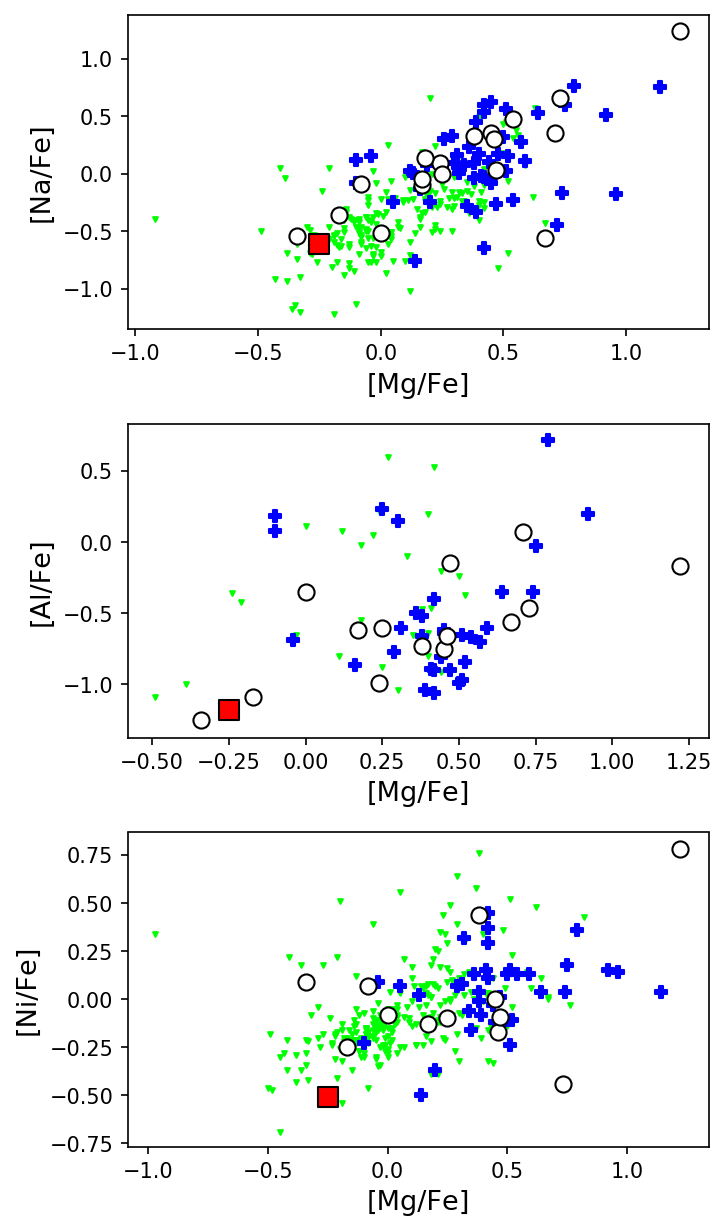

In [5]:
# Na Al and Ni vs Mg
fig, axs = plt.subplots(3, 1, figsize=(5,10),dpi=150,
                        gridspec_kw={'hspace': 0.3, 'wspace': 0.2})

(ax1,ax2,ax3) = axs

#Na vs Mg
nadata = np.genfromtxt("natableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
mgdata = np.genfromtxt("mgtableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])

nabooiix =[-2.86,-2.87,-2.63,-2.92]
nabooiiy =[0.54,0.3,0.45,0.6]
mgbooiix =[-2.86,-2.87,-2.63,-2.92]
mgbooiiy =[0.42,0.26,0.39,0.42]
ax1.scatter(mgbooiiy,nabooiiy, color='b',marker='P')

naumax=[-3.15,-3.28,-2.39]
naumay=[-0.03,-0.03,-0.17]
mgumax=[-3.15,-3.28,-2.39]
mgumay=[0.42,0.45,0.74]
ax1.scatter(mgumay,naumay, color='b',marker='P')

nacomx=[-2.36,-2.93,-2.58]
nacomy=[-0.76,-0.18,0.17]
mgcomx=[-2.36,-2.93,-2.58]
mgcomy=[0.14,0.96,0.48]
ax1.scatter(mgcomy,nacomy, color='b',marker='P')

nabooix=[-3.71,-3.06,-2.64,-2.16,-3.44,-2.15,-2.28,-1.99,-3.18,-2.49]
nabooiy=[-0.08,0.33,0.01,-0.28,0.75,-0.25,0.08,-0.02,-0.33,-0.25]
mgbooix=[-3.71,-3.06,-2.64,-2.16,-3.44,-2.15,-2.28,-1.99,-3.18,-2.49]
mgbooiy=[0.45,0.29,0.13,0.35,1.14,0.05,0.34,0.41,0.39,0.2]
ax1.scatter(mgbooiy,nabooiy,color='b',marker='P')

naherx=[-2.07,-2.09,-2.52,-2.83,-2.53,-2.28]
nahery=[0.76,0.6,0.08,0.09,0.07,-0.08]
mgherx=[-2.07,-2.09,-2.52,-2.83,-2.53,-2.28]
mghery=[0.79,0.75,0.19,0.3,0.25,-0.1]
ax1.scatter(mghery,nahery, color='b',marker='P')

naleox=[-3.19,-2.88,-2.18]
naleoy=[0.01,0.17,0.12]
mgleox=[-3.19,-2.88,-2.18]
mgleoy=[0.32,0.4,-0.1]
ax1.scatter(mgleoy,naleoy,color='b',marker='P')

nacvnx=[-2.49]
nacvny=[0.02]
mgcvnx=[-2.49]
mgcvny=[0.12]
ax1.scatter(mgcvny,nacvny,color='b',marker='P')

nagrusx=[-2.49,-2.69,-2.94]
nagrusy=[0.02,0.1,-0.45]
mggrusx=[-2.49,-2.69,-2.94]
mggrusy=[0.51,0.44,0.72]
ax1.scatter(mggrusy,nagrusy, color='b',marker='P')

natuciiix=[-2.69,-2.58]
natuciiiy=[0.32,0.53]
mgtuciiix=[-2.69,-2.58]
mgtuciiiy=[0.5,0.64]
ax1.scatter(mgtuciiiy,natuciiiy, color='b',marker='P')

natuciix=[-2.93,-2.92,-2.41,-3.23,-2.69,-3.08,-3.34]
natuciiy=[0.15,0.56,-0.13,0.23,-0.65,0.09,0.62]
mgtuciix=[-2.93,-2.92,-2.41,-3.23,-2.69,-3.08,-3.34]
mgtuciiy=[-0.04,0.51,0.16,0.36,0.42,0.38,0.45]
ax1.scatter(mgtuciiy,natuciiy,color='b',marker='P')

nasegix=[-1.42,-1.67,-2.32,-2.4,-3.6,-3.78,-3.57]
nasegiy=[-0.04,-0.26,0.15,-0.23,0.11,0.28,0.51]
mgsegix=[-1.42,-1.67,-2.32,-2.4,-3.6,-3.78,-3.57]
mgsegiy=[0.38,0.47,0.52,0.54,0.59,0.57,0.92]
ax1.scatter(mgsegiy,nasegiy, color='b',marker='P')

nasegiix=[-2.9]
nasegiiy=[0.16]
mgsegiix=[-2.9]
mgsegiiy=[0.31]
ax1.scatter(mgsegiiy,nasegiiy, color='b',marker='P')

naretx=[-2.91,-2.77,-2.08,-3.01,-2.73,-2.19,-3.54]
narety=[0.35,-0.1,0.09,0.3,0.14,-0.09,0.48]
mgretx=[-2.91,-2.77,-2.08,-3.01,-2.73,-2.19,-3.54]
mgrety=[0.45,0.17,0.24,0.46,0.18,-0.08,0.54]
ax1.scatter(mgrety,narety, color='white',s=60, edgecolors='black')

nacariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.7,-2.48]
nacariiy=[-0.36,-0.54,0.33,0.35,0.66,-0.05,0.03,-0.56,-0.52]
mgcariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.7,-2.48]
mgcariiy=[-0.17,-0.34,0.38,0.71,0.73,0.17,0.47,0.67,0]
ax1.scatter(mgcariiy,nacariiy,color='white',s=60, edgecolors='black')

nacariiix=[-3.89,-2.25]
nacariiiy=[1.239,0]
mgcariiix=[-3.89,-2.25]
mgcariiiy=[1.22,0.25]
ax1.scatter(mgcariiiy,nacariiiy,color='white',s=60, edgecolors='black')

data = np.genfromtxt("namg_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax1.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)

mghe=-0.25
nahe=-0.61
ax1.scatter(mghe,nahe, color='red', marker='s',s=100,edgecolors='black',zorder=2)

#Al vs Mg
booiix =[-2.86,-2.63,-2.92]
booiiy =[-0.9,-1.04,-1.06]
abooiix =[-2.86,-2.63,-2.92]
abooiiy =[0.42,0.39,0.42] #counterintuitively, this is mg not al
ax2.scatter(abooiiy,booiiy,  color='b',marker='P')
umax=[-2.39]
umay=[-0.35]
aumax=[-2.39]
aumay=[0.74]
ax2.scatter(aumay,umay,  color='b',marker='P')
booix=[-3.71,-3.06,-1.99]
booiy=[-0.64,-0.77,-0.89]
abooix=[-3.71,-3.06,-1.99]
abooiy=[0.45,0.29,0.41]
ax2.scatter(abooiy,booiy,  color='b',marker='P')
leox=[-2.18]
leoy=[0.08]
aleox=[-2.18]
aleoy=[-0.1]
ax2.scatter(aleoy,leoy, color='b',marker='P')
grusx=[-2.49,-2.69]
grusy=[-0.97,-0.81]
agrusx=[-2.49,-2.69]
agrusy=[0.51,0.44]
ax2.scatter(agrusy,grusy,  color='b',marker='P')
herx=[-2.07,-2.09,-2.83,-2.53,-2.28]
hery=[0.72,-0.03,0.15,0.23,0.18]
aherx=[-2.07,-2.09,-2.83,-2.53,-2.28]
ahery=[0.79,0.75,0.3,0.25,-0.1]
ax2.scatter(ahery,hery,  color='b',marker='P')
tuciiix=[-2.69,-2.58]
tuciiiy=[-0.99,-0.35]
atuciiix=[-2.69,-2.58]
atuciiiy=[0.5,0.64]
ax2.scatter(atuciiiy,tuciiiy,  color='b',marker='P')
tuciix=[-2.93,-2.92,-2.41,-3.23,-2.69,-3.08,-3.34]
tuciiy=[-0.69,-0.65,-0.86,-0.5,-0.4,-0.52,-0.62]
ax2.scatter(mgtuciiy,tuciiy,  color='b',marker='P')
segix=[-1.42,-1.67,-2.32,-2.4,-3.6,-3.78,-3.57]
segiy=[-0.66,-0.9,-0.84,-0.67,-0.6,-0.7,0.2]
ax2.scatter(mgsegiy,segiy,  color='b',marker='P')
segiix=[-2.9]
segiiy=[-0.6]
ax2.scatter(mgsegiiy,segiiy,  color='b',marker='P')
ax2.scatter(mghe,-1.18, color='red', marker='s',s=100,edgecolors='black',zorder=2)
retx=[-2.91,-2.08,-3.01]
rety=[-0.75,-0.99,-0.66]
aretx=[-2.91,-2.08,-3.01]
arety=[0.45,0.24,0.46]
ax2.scatter(arety,rety, color='white',s=60, edgecolors='black')
cariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.7,-2.48]
cariiy=[-1.09,-1.25,-0.73,0.07,-0.46,-0.62,-0.15,-0.56,-0.35]
cariiix=[-3.89,-2.25]
cariiiy=[-0.17,-0.6]
ax2.scatter(mgcariiy,cariiy,color='white',s=60, edgecolors='black')
ax2.scatter(mgcariiiy,cariiiy,color='white',s=60, edgecolors='black')
data = np.genfromtxt("almg_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax2.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)

#Ni vs Mg
herx=[-2.07,-2.09,-2.28]
hery=[0.36,0.18,-0.23]
aherx=[-2.07,-2.09,-2.28]
ahery=[0.79,0.75,-0.1]
ax3.scatter(ahery,hery, color='b',marker='P')
booiix =[-2.63,-2.92]
booiiy =[0.29,0.45]
abooiix =[-2.86,-2.92]
abooiiy =[0.42,0.42]
ax3.scatter(abooiiy,booiiy, color='b',marker='P')
umax=[-3.15,-2.39]
umay=[0.37,0.04]
aumax=[-3.15,-2.39]
aumay=[0.42,0.74]
ax3.scatter(aumay,umay, color='b',marker='P')
comx=[-2.36,-2.93,-2.58]
comy=[-0.5,0.14,-0.13]
ax3.scatter(mgcomy,comy,color='b',marker='P')
booix=[-3.71,-3.06,-2.64,-2.16,-2.15,-2.28,-1.99,-1.8,-3.18,-2.49]
booiy=[-0.12,0.07,0.02,-0.16,0.04,0.07,-0.06,0.15,-0.08,-0.37]
ax3.scatter(mgbooiy,booiy, color='b',marker='P')
leox=[-3.19]
leoy=[0.32]
aleox=[-3.19]
aleoy=[0.32]
ax3.scatter(aleoy,leoy,color='b',marker='P')
grusx=[-2.49,-2.69]
grusy=[-0.24,-0.03]
agrusx=[-2.49,-2.69]
agrusy=[0.51,0.44]
ax3.scatter(agrusy,grusy, color='b',marker='P')
tuciiix=[-2.69,-2.58]
tuciiiy=[0.13,0.04]
atuciiix=[-2.69,-2.58]
atuciiiy=[0.5,0.64]
ax3.scatter(atuciiiy,tuciiiy, color='b',marker='P')
tuciix=[-2.93,-2.92,-3.23,-2.69,-3.08]
tuciiy=[0.09,0.15,0.13,0.11,0.04]
atuciix=[-2.93,-2.92,-3.23,-2.69,-3.08]
atuciiy=[-0.04,0.51,0.36,0.42,0.38]
ax3.scatter(atuciiy,tuciiy, color='b',marker='P')
segix=[-1.42,-1.67,-2.32,-2.4,-3.6,-3.57]
segiy=[-0.01,0.01,-0.11,0.13,0.13,0.15]
asegix=[-1.42,-1.67,-2.32,-2.4,-3.6,-3.57]
asegiy=[0.38,0.47,0.52,0.54,0.59,0.92]
ax3.scatter(asegiy,segiy, color='b',marker='P')
segiix=[-2.9]
segiiy=[0.08]
ax3.scatter(mgsegiiy,segiiy, color='b',marker='P')
retx=[-2.91,-3.01,-2.19]
rety=[0,-0.17,0.07]
aretx=[-2.91,-3.01,-2.19]
arety=[0.45,0.46,-0.08]
ax3.scatter(arety,rety,color='white',s=60, edgecolors='black')
cariix=[-2.2,-2.19,-2.35,-3.5,-2.65,-2.87,-2.48]
cariiy=[-0.25,0.09,0.44,-0.44,-0.13,-0.09,-0.08]
acariix=[-2.2,-2.19,-2.35,-3.5,-2.65,-2.87,-2.48]
acariiy=[-0.17,-0.34,0.38,0.73,0.17,0.47,0]
cariiix=[-3.89,-2.25]
cariiiy=[0.78,-0.1]
ax3.scatter(acariiy,cariiy,color='white',s=60, edgecolors='black')
ax3.scatter(mgcariiiy,cariiiy,color='white',s=60, edgecolors='black')
data = np.genfromtxt("nimg_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax3.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)
ax3.scatter(mghe,-0.51, color='red', marker='s',s=100,edgecolors='black',zorder=2)

ax1.set_xlabel('[Mg/Fe]',fontsize=13)
ax1.set_ylabel('[Na/Fe]',fontsize=13)
ax2.set_xlabel('[Mg/Fe]',fontsize=13)
ax2.set_ylabel('[Al/Fe]',fontsize=13)
ax3.set_xlabel('[Mg/Fe]',fontsize=13)
ax3.set_ylabel('[Ni/Fe]',fontsize=13)

Text(0.5, 0, '[Fe/H]')

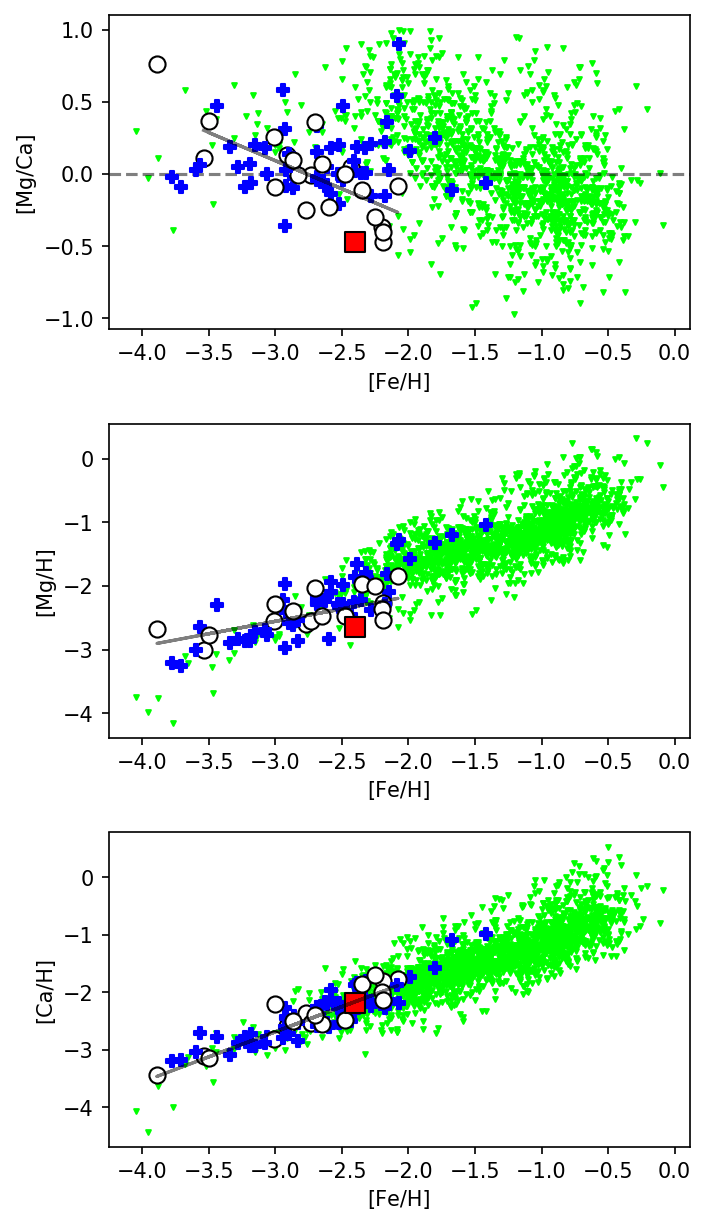

In [24]:
#Mg vs Ca Comparisons
fig, axs = plt.subplots(3, 1, figsize=(5,10),dpi=150,
                        gridspec_kw={'hspace': 0.3, 'wspace': 0.2})

(ax1,ax2,ax3) = axs

caherx=[-2.07,-2.09,-2.52,-2.83,-2.53,-2.28]
cahery=[-0.11,0.21,-0.01,0.29,0.25,0.05]
mgcaher=np.subtract(mghery,cahery)
ax1.scatter(caherx,mgcaher,color='b',marker='P')
cabooiix =[-2.86,-2.87,-2.63,-2.92]
cabooiiy =[0.45,0.36,0.47,0.5]
mgcabooii=np.subtract(mgbooiiy,cabooiiy)
ax1.scatter(cabooiix,mgcabooii, color='b',marker='P')
caumax=[-3.15,-3.28,-2.39]
caumay=[0.22,0.4,0.55]
mgcauma=np.subtract(mgumay,caumay)
ax1.scatter(caumax,mgcauma, color='b',marker='P')
cacomx=[-2.36,-2.93,-2.58]
cacomy=[0.13,0.65,0.62]
mgcacom=np.subtract(mgcomy,cacomy)
ax1.scatter(cacomx,mgcacom, color='b',marker='P')
mgbooix=[-3.71,-3.06,-2.33,-2.64,-2.16,-3.44,-2.15,-2.28,-1.99,-1.8,-3.18,-2.49]
mgbooiy=[0.45,0.29,0.41,0.13,0.35,1.14,0.05,0.34,0.41,0.47,0.39,0.2]
cabooix=[-3.71,-3.06,-2.33,-2.64,-2.16,-3.44,-2.15,-2.28,-1.99,-1.8,-3.18,-2.49]
cabooiy=[0.54,0.29,0.23,0.18,-0.01,0.67,0.02,0.13,0.25,0.22,0.45,0.24]
mgcabooi=np.subtract(mgbooiy,cabooiy)
ax1.scatter(cabooix,mgcabooi, color='b',marker='P')
mgretx=[-2.91,-2.77,-2.08,-3.01,-2.73,-2.19,-3.54]
mgrety=[0.45,0.17,0.24,0.46,0.18,-0.08,0.54]
caretx=[-2.91,-2.77,-2.08,-3.01,-2.73,-2.19,-3.54]
carety=[0.32,0.42,0.32,0.2,0.19,0.39,0.43]
mgcaret=np.subtract(mgrety,carety)
ax1.scatter(caretx,mgcaret, color='white',s=60, edgecolors='black')
mgleox=[-3.19,-2.18]
mgleoy=[0.32,-0.1]
caleox=[-3.19,-2.18]
caleoy=[0.25,0.05]
mgcaleo=np.subtract(mgleoy,caleoy)
ax1.scatter(caleox,mgcaleo,color='b',marker='P')
cacvnix=[-2.18,-2.52]
cacvniy=[-0.1,0.33]
mgcacvni=np.subtract(mgcvny,cacvniy)
ax1.scatter(cacvnix,mgcacvni,color='b',marker='P')
cagrusx=[-2.49,-2.69,-2.94]
cagrusy=[0.04,0.11,0.14]
mgcagrus=np.subtract(mggrusy,cagrusy)
ax1.scatter(cagrusx,mgcagrus, color='b',marker='P')
mghorx=[-2.43,-2.6,-2.83]
mghory=[-0.02,-0.23,-0.03]
cahorx=[-2.43,-2.6,-2.83]
cahory=[-0.07,0,-0.02]
mgcahor=np.subtract(mghory,cahory)
ax1.scatter(cahorx,mgcahor,color='white',s=60, edgecolors='black')
catuciix=[-2.93,-2.92,-2.41,-3.23,-2.69,-3.08,-3.34]
catuciiy=[0.32,0.48,0.07,0.45,0.44,0.2,0.26]
mgcatucii=np.subtract(mgtuciiy,catuciiy)
ax1.scatter(catuciix,mgcatucii,color='b',marker='P')
mgtuciiix=[-2.61,-2.69,-2.69,-2.58]
mgtuciiiy=[0.45,0.5,0.4,0.64]
catuciiix=[-2.61,-2.69,-2.69,-2.58]
catuciiiy=[0.4,0.35,0.44,0.46]
mgcatuciii=np.subtract(mgtuciiiy,catuciiiy)
ax1.scatter(catuciiix,mgcatuciii, color='b',marker='P')
casegix=[-1.42,-1.67,-2.32,-2.4,-3.6,-3.78,-3.57]
casegiy=[0.44,0.58,0.51,0.52,0.56,0.59,0.86]
mgcasegi=np.subtract(mgsegiy,casegiy)
ax1.scatter(casegix,mgcasegi, color='b',marker='P')
casegiix=[-2.9]
casegiiy=[0.17]
mgcasegii=np.subtract(mgsegiiy,casegiiy)
ax1.scatter(casegiix,mgcasegii, color='b',marker='P')
cacariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.7,-2.48]
cacariiy=[0.2,0.06,0.49,0.8,0.36,0.10,0.37,0.31,0]
cacariiix=[-3.89,-2.25]
cacariiiy=[0.46,0.55]
mgcacarii=np.subtract(mgcariiy,cacariiy)
mgcacariii=np.subtract(mgcariiiy,cacariiiy)
ax1.scatter(cacariix,mgcacarii,color='white',s=60, edgecolors='black')
ax1.scatter(cacariiix,mgcacariii,color='white',s=60, edgecolors='black')

fitlinex= cacariix + cahorx + caretx
fitliney= [-0.37, -0.4,  -0.11, -0.09,  0.37,  0.07,  0.1,   0.36,  0., 0.05, -0.23, -0.01,0.13, -0.25, -0.08,  0.26, -0.01, -0.47,  0.11]
m, b = np.polyfit(fitlinex, fitliney, 1)
y= [i *m +b for i in fitlinex]
ax1.plot(fitlinex, y,'black',alpha=0.5)

cahe=0.22
mgcahe=np.subtract(mghe,cahe)
ax1.scatter(-2.4,mgcahe, color='red', marker='s',s=100,edgecolors='black',zorder=2)

data = np.genfromtxt("mgca_fe_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax1.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)

ax1.axhline(y=0, color='black',linestyle='--',alpha=0.5,zorder=0)
ax1.set_ylabel('[Mg/Ca]',fontsize=10)
ax1.set_xlabel('[Fe/H]',fontsize=10)

#Mg/H vs Fe/H
mghhor=np.add(mghorx,mghory)
ax2.scatter(mghorx,mghhor,color='b',marker='P')
mghbooii=np.add(mgbooiix,mgbooiiy)
ax2.scatter(mgbooiix, mghbooii, color='b',marker='P')
mghuma=np.add(mgumax,mgumay)
ax2.scatter(mgumax,mghuma, color='b',marker='P')
mghcom=np.add(mgcomx,mgcomy)
ax2.scatter(mgcomx,mghcom, color='b',marker='P')
mghbooi=np.add(mgbooix,mgbooiy)
ax2.scatter(mgbooix,mghbooi, color='b',marker='P')
mghret=np.add(mgretx,mgrety)
ax2.scatter(mgretx,mghret,color='white',s=60, edgecolors='black')
mghher=np.add(mgherx,mghery)
ax2.scatter(mgherx,mghher, color='b',marker='P')
mghleo=np.add(mgleox,mgleoy)
ax2.scatter(mgleox,mghleo,color='b',marker='P')
mghcvn=np.add(mgcvnx,mgcvny)
ax2.scatter(mgcvnx,mghcvn,color='b',marker='P')
mghgrus=np.add(mggrusx,mggrusy)
ax2.scatter(mggrusx,mghgrus, color='b',marker='P')
mghtuciii=np.add(mgtuciiix,mgtuciiiy)
ax2.scatter(mgtuciiix,mghtuciii, color='b',marker='P')
mghtucii=np.add(mgtuciix,mgtuciiy)
ax2.scatter(mgtuciix,mghtucii, color='b',marker='P')
mghsegi=np.add(mgsegix,mgsegiy)
ax2.scatter(mgsegix,mghsegi, color='b',marker='P')
mghsegii=np.add(mgsegiix,mgsegiiy)
ax2.scatter(mgsegiix,mghsegii, color='b',marker='P')
mghcarii=np.add(mgcariix,mgcariiy)
ax2.scatter(mgcariix,mghcarii,color='white',s=60, edgecolors='black')
mghcariii=np.add(mgcariiix,mgcariiiy)
ax2.scatter(mgcariiix,mghcariii,color='white',s=60, edgecolors='black')
fitlinex= mgcariix + mgcariiix + mgretx + mghorx
fitliney= [-2.37, -2.53, -1.97, -2.29, -2.77, -2.48, -2.4,  -2.03, -2.48, -2.67, -2., -2.46, -2.6,  -1.84, -2.55, -2.55, -2.27 ,-3.,-2.45, -2.83, -2.86]
m, b = np.polyfit(fitlinex, fitliney, 1)
y= [i *m +b for i in fitlinex]
ax2.plot(fitlinex, y,'black',alpha=0.5)

data = np.genfromtxt("mgh_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax2.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)

mghhe=-0.25+-2.4
ax2.scatter(-2.4,mghhe, color='red', marker='s',s=100,edgecolors='black',zorder=2)
ax2.set_ylabel('[Mg/H]')
ax2.set_xlabel('[Fe/H]')

#Ca/H vs Fe/H
cahhor=np.add(cahorx,cahory)
ax3.scatter(cahorx,cahhor,color='b',marker='P')
cahbooii=np.add(cabooiix,cabooiiy)
ax3.scatter(cabooiix, cahbooii, color='b',marker='P')
cahuma=np.add(caumax,caumay)
ax3.scatter(caumax,cahuma, color='b',marker='P')
cahcom=np.add(cacomx,cacomy)
ax3.scatter(cacomx,cahcom, color='b',marker='P')
cahbooi=np.add(cabooix,cabooiy)
ax3.scatter(cabooix,cahbooi, color='b',marker='P')
cahret=np.add(caretx,carety)
ax3.scatter(caretx,cahret, color='white',s=60, edgecolors='black')
cahher=np.add(caherx,cahery)
ax3.scatter(caherx,cahher, color='b',marker='P')
cahleo=np.add(caleox,caleoy)
ax3.scatter(caleox,cahleo,color='b',marker='P')
cahcvn=np.add(cacvnix,cacvniy)
ax3.scatter(cacvnix,cahcvn,color='b',marker='P')
cahgrus=np.add(cagrusx,cagrusy)
ax3.scatter(cagrusx,cahgrus, color='b',marker='P')
cahtuciii=np.add(catuciiix,catuciiiy)
ax3.scatter(catuciiix,cahtuciii, color='b',marker='P')
cahtucii=np.add(catuciix,catuciiy)
ax3.scatter(catuciix,cahtucii, color='b',marker='P')
cahsegi=np.add(casegix,casegiy)
ax3.scatter(casegix,cahsegi,color='b',marker='P')
cahsegii=np.add(casegiix,casegiiy)
ax3.scatter(casegiix,cahsegii, color='b',marker='P')
cahcarii=np.add(cacariix,cacariiy)
ax3.scatter(cacariix,cahcarii,color='white',s=60, edgecolors='black')
cahcariii=np.add(cacariiix,cacariiiy)
ax3.scatter(cacariiix,cahcariii,color='white',s=60, edgecolors='black')

fitlinex= cacariix + cacariiix + caretx + cahorx
fitliney= [-2. ,  -2.13, -1.86, -2.2,  -3.14, -2.55, -2.5,  -2.39, -2.48,-3.43, -1.7,-2.59, -2.35, -1.76, -2.81, -2.54, -1.8,  -3.11,-2.5,  -2.6,  -2.85]
m, b = np.polyfit(fitlinex, fitliney, 1)
y= [i *m +b for i in fitlinex]
ax3.plot(fitlinex, y,'black',alpha=0.5)

data = np.genfromtxt("cah_dsphs.csv", delimiter=",", names=["a", "b","c"])
ax3.scatter(data['b'], data['c'], color='lime',s=5,marker='v',zorder=0)

cahhe=0.22+-2.4
ax3.scatter(-2.4,cahhe, color='red', marker='s',s=100,edgecolors='black',zorder=2)
ax3.set_ylabel('[Ca/H]')
ax3.set_xlabel('[Fe/H]')

## Boxplot

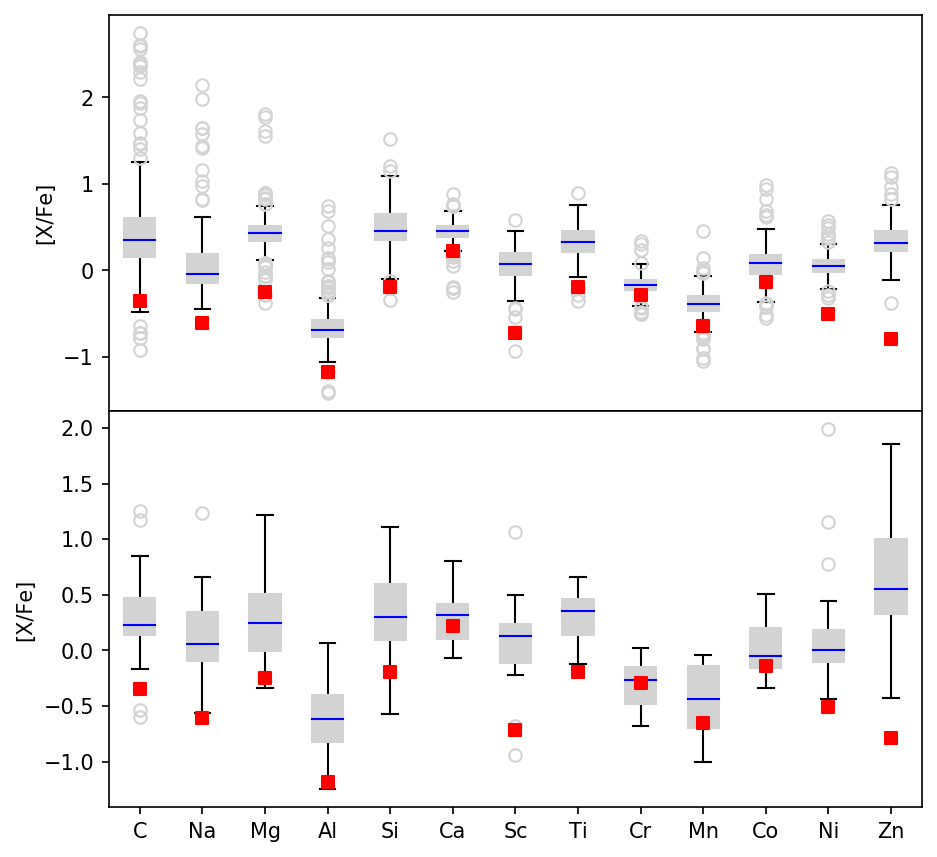

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(7,7),dpi=150,
                        gridspec_kw={'hspace': 0, 'wspace': 0.2})

(ax1,ax2) = axs

carbon = np.genfromtxt("ctableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
sodium = np.genfromtxt("natableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
na=np.delete(sodium["f"],0)
magnesium = np.genfromtxt("mgtableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
mg=np.delete(magnesium["f"],0)
data = np.genfromtxt("altableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
al=np.delete(data["f"],0)
data = np.genfromtxt("sitableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
si=np.delete(data["f"],0)
data = np.genfromtxt("khalo.csv", delimiter=",", names=["a", "b","c","d","e","f"])
k=np.delete(data["f"],0)
data = np.genfromtxt("catableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ca=np.delete(data["f"],0)
data = np.genfromtxt("sctableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
sc=np.delete(data["f"],0)
data = np.genfromtxt("titableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ti=np.delete(data["f"],0)
data = np.genfromtxt("vtableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
v=np.delete(data["f"],0)
data = np.genfromtxt("crtableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
cr=np.delete(data["f"],0)
data = np.genfromtxt("mntableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
mn=np.delete(data["f"],0)
data = np.genfromtxt("cotableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
co=np.delete(data["f"],0)
data = np.genfromtxt("nitableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ni=np.delete(data["f"],0)
data = np.genfromtxt("zntableExport.csv", delimiter=",", names=["a", "b","c","d","e","f"])
zn=np.delete(data["f"],0)
elements=[carbon["f"],na,mg,al,si,ca,sc,ti,cr,mn,co,ni,zn]
c='lightgray'
ax1.boxplot(elements,zorder=1,patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='blue'))
numbers = [1,2,3,4,5,6,7,8,9,10,11,12,13]
heabun=[-0.35,-0.61,-0.25,-1.18,-0.19,0.22,-0.72,-0.19,-0.29,-0.65,-0.14,-0.51,-0.79]
ax1.scatter(numbers,heabun,marker='s',color='red',zorder=2)

c=[-0.05,-0.6,0.38,0.29,-0.17,-0.54,0.17,1.17,1.25,0.15,0.2,0.85,0.35,0.65,0.13,0.15,0.5,0.26]
na=[-0.36,-0.54,0.33,0.35,0.66,-0.05,0.03,-0.56,-0.52,1.239,0,0.35,-0.1,0.09,0.3,0.14,-0.09,0.48]
mg=[-0.02,-0.23,-0.03,-0.17,-0.34,0.38,0.71,0.73,0.17,0.47,0.67,0,1.22,0.25,0.45,0.17,0.24,0.46,0.81,0.18,-0.08,0.54,0.34]
al=[-0.9,-1.09,-1.25,-0.73,0.07,-0.46,-0.62,-0.15,-0.56,-0.35,-0.17,-0.6,-0.75,-0.99,-0.66]
si=[0.17,-0.10,-0.35,1.11,0.35,0.61,0.31,0.09,-0.57,0.17,1.08,0.60,0.26,0.55,0.69,0.3,0.02]
k=[0.13,0.79,1.02,0.32,0.31,1.09,0.13,0.79,1.02,0.32,0.31,1.09]
ca=[-0.07,0,-0.02,0.2,0.06,0.49,0.8,0.36,0.10,0.37,0.31,0,0.46,0.55,0.32,0.42,0.32,0.2,0.19,0.39,0.43]
sc=[0.15,-0.09,-0.94,-0.22,0.12,0.24,0.24,-0.16,0.13,0.23,-0.12,0.14,0.5,-0.08,0.16,0.3,-0.17,1.06,0,-0.68,0.1,0.48]
ti=[-0.08,-0.12,0.59,0.66,0.27,0.05,0.45,0.3,0.09,0.3,0.43,0.45,0.48,0.16,0.4,0.62]
v=[0.7]
cr=[-0.11,-0.2,-0.55,-0.68,-0.64,-0.15,-0.47,-0.12,-0.27,-0.47,-0.14,-0.19,-0.5,-0.19,-0.41,0.01,-0.4,0.02,-0.52]
mn=[-0.06,-0.04,-0.06,-0.68,-0.64,-0.06,-0.91,-0.99,-0.48,-0.32,-0.62,-0.70,-0.19,-1.0,-0.7,-0.38,-0.4,-0.12]
co=[0.29,-0.16,-0.1,-0.2,0.16,0,-0.14,-0.34,-0.12,0.51,-0.16,0.37,0.06,0.21]
ni=[0.01,0.03,-0.11,-0.25,0.09,0.44,1.99,-0.44,-0.13,-0.09,-0.08,0.78,-0.1,0,-0.17,1.15,0.07,0.21]
zn=[-0.13,0.52,0.55,1.58,0.5,-0.43,1.03,-0.32,1.86,0.55,1,0.92,0.33]

elements=[c,na,mg,al,si,ca,sc,ti,cr,mn,co,ni,zn]
c='lightgray'
ax2.boxplot(elements,zorder=1,patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='blue'))
c1=[0.2,0.85,0.35,0.65,0.13,0.15,0.5,0.26]
na1=[0.35,-0.1,0.09,0.3,0.14,-0.09,0.48]
mg1=[0.45,0.17,0.24,0.46,0.81,0.18,-0.08,0.54,0.34]
al1=[-0.75,-0.99,-0.66]
si1=[0.26,0.55,0.69,0.3,0.02]
k1=[0.13,0.79,1.02,0.32,0.31,1.09] #none
ca1=[0.32,0.42,0.32,0.2,0.19,0.39,0.43]
sc1=[-0.08,0.16,0.3,-0.17,1.06,0,-0.68,0.1,0.48]
ti1=[0.45,0.48,0.16,0.4,0.62]
cr1=[-0.19,-0.5,-0.19,-0.41,0.01,-0.4,0.02,-0.52]
mn1=[-1.0,-0.7,-0.38,-0.4,-0.12]
co1=[0.37,0.06,0.21]
ni1=[0,-0.17,1.15,0.07,0.21]
zn1=[1,0.92,0.33]
elements=[c,na,mg,al,si,k,ca,sc,ti,cr,mn,co,ni,zn]
c=[0,1,0,0.5]
ax2.scatter(numbers,heabun,marker='s',color='red',zorder=3)

labels = [item.get_text() for item in ax2.get_xticklabels()]
labels = ['C','Na','Mg','Al','Si','Ca','Sc','Ti','Cr','Mn','Co','Ni','Zn']

ax2.set_xticklabels(labels)
ax1.set_ylabel('[X/Fe]')
ax2.set_ylabel('[X/Fe]')

for ax in axs:
    ax.label_outer()

## Action Diagram

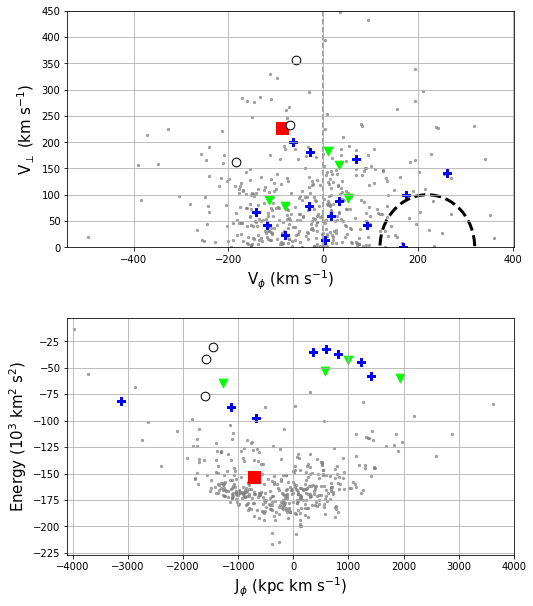

In [33]:
fig, axs = plt.subplots(2, sharex=False, sharey=False,figsize=(8,10),gridspec_kw={'hspace': 0.3, 'height_ratios': [1,1]})
size=75
data = np.genfromtxt("toomre_vxvzvphi.csv", delimiter=",", names=["name","v_x","v_z", "v_phi"])
vperp=  (data["v_z"]**2)**(1/2)
axs[0].scatter(data['v_phi'], vperp,color='grey',alpha=0.4,s=5,label= 'MW Halo Stars')
axs[0].scatter(data['v_phi'][1], vperp[1], color='red',marker='s', s=150, label='J0010-1735')
circle=plt.Circle((220, 0), 100, fill=False, color='black',linestyle='dashed',linewidth='3')
ufd = np.genfromtxt("ufd_vxvzvphi.csv", delimiter=",", names=["name","v_x","v_z", "x"])
ufdvxz= (ufd["v_z"]**2)**(1/2)
axs[0].scatter(ufd['x'][1], ufdvxz[1], s=size, color='b',marker='P')
axs[0].scatter(ufd['x'][2],ufdvxz[2], s=size, color='b',marker='P')
axs[0].scatter(ufd['x'][3], ufdvxz[3],  s=size,color='b',marker='P')
axs[0].scatter(ufd['x'][4], ufdvxz[4],  s=size,color='b',marker='P')
axs[0].scatter(ufd['x'][5], ufdvxz[5],  s=size,color='lime',marker='v') #carina i
axs[0].scatter(ufd['x'][6], ufdvxz[6],  s=size,color='white', edgecolors='black')
axs[0].scatter(ufd['x'][7], ufdvxz[7],  s=size,color='white', edgecolors='black')
axs[0].scatter(ufd['x'][8], ufdvxz[8],  s=size,color='lime',marker='v')
axs[0].scatter(ufd['x'][9], ufdvxz[9],  s=size,color='b',marker='P')
axs[0].scatter(ufd['x'][10], ufdvxz[10], s=size,color='lime',marker='v')
axs[0].scatter(ufd['x'][11], ufdvxz[11], s=size, color='b',marker='P')
axs[0].scatter(ufd['x'][12], ufdvxz[12], s=size, color='b',marker='P')
axs[0].scatter(ufd['x'][13], ufdvxz[13], s=size, color='b',marker='P')
axs[0].scatter(ufd['x'][14], ufdvxz[14], s=size, color='b',marker='P')
axs[0].scatter(ufd['x'][15], ufdvxz[15], s=size, color='white', edgecolors='black')
axs[0].scatter(ufd['x'][16], ufdvxz[16], s=size,color='lime',marker='v') #sculptor
axs[0].scatter(ufd['x'][17], ufdvxz[17], s=size, color='b',marker='P')
axs[0].scatter(ufd['x'][18], ufdvxz[18], s=size, color='b',marker='P')
axs[0].scatter(ufd['x'][19], ufdvxz[19], s=size, color='b',marker='P')
axs[0].scatter(ufd['x'][20], ufdvxz[20], s=size, color='b',marker='P')
axs[0].scatter(ufd['x'][21], ufdvxz[21], s=size,color='lime',marker='v') #ursa minor
axs[0].scatter(ufd['x'][22], ufdvxz[22], s=size,color='b',marker='P') #ursa major
axs[0].axvline(x=0,color='grey', linestyle='--',zorder=-1)
axs[0].add_artist(circle)
axs[0].grid(b=None)
axs[0].set_ylim(0,450)
axs[0].set_xlabel(r"V$_{\phi}$ (km s$^{-1}$)",fontsize=15)
axs[0].set_ylabel(r"V$_{\perp}$ (km s$^{-1}$)",fontsize=15)

data1 = np.genfromtxt("jphi_energy.csv", delimiter=",", names=["name","j_phi","energy"])
energy=data1['energy']/1000
axs[1].scatter(data1['j_phi'], energy,color='grey',alpha=0.4,s=5,label='MW Halo Stars')
axs[1].scatter(data1['j_phi'][1], energy[1], color='red',s=150,marker='s',label='J0010-1735',zorder=2)
ufd = np.genfromtxt("ufd_jphienergy.csv", delimiter=",", names=["name","x","y"])
ufdvxz= ufd["y"]/1000
axs[1].scatter(ufd['x'][1], ufdvxz[1], s=size, color='b',marker='P')
axs[1].scatter(ufd['x'][2],ufdvxz[2], s=size, color='b',marker='P')
axs[1].scatter(ufd['x'][3], ufdvxz[3],  s=size,color='b',marker='P')
axs[1].scatter(ufd['x'][4], ufdvxz[4],  s=size,color='b',marker='P')
axs[1].scatter(ufd['x'][5], ufdvxz[5],  s=size,color='lime',marker='v') #carina i
axs[1].scatter(ufd['x'][6], ufdvxz[6],  s=size,color='white', edgecolors='black',zorder=3)
axs[1].scatter(ufd['x'][7], ufdvxz[7],  s=size,color='white', edgecolors='black',zorder=3)
axs[1].scatter(ufd['x'][8], ufdvxz[8],  s=size,color='lime',marker='v')
axs[1].scatter(ufd['x'][9], ufdvxz[9],  s=size,color='b',marker='P')
axs[1].scatter(ufd['x'][10], ufdvxz[10], s=size, color='lime',marker='v')
axs[1].scatter(ufd['x'][11], ufdvxz[11], s=size, color='b',marker='P')
axs[1].scatter(ufd['x'][12], ufdvxz[12], s=size, color='b',marker='P')
axs[1].scatter(ufd['x'][13], ufdvxz[13], s=size, color='white', edgecolors='black',zorder=3)
axs[1].scatter(ufd['x'][14], ufdvxz[14], s=size, color='b',marker='P')
axs[1].scatter(ufd['x'][15], ufdvxz[15], s=size, color='white', edgecolors='black',zorder=3)
axs[1].scatter(ufd['x'][16], ufdvxz[16], s=size, color='lime',marker='v') #sculptor
axs[1].scatter(ufd['x'][17], ufdvxz[17], s=size, color='b',marker='P')
axs[1].scatter(ufd['x'][18], ufdvxz[18], s=size, color='b',marker='P')
axs[1].scatter(ufd['x'][19], ufdvxz[19], s=size, color='b',marker='P')
axs[1].scatter(ufd['x'][20], ufdvxz[20], s=size, color='b',marker='P')
axs[1].scatter(ufd['x'][21], ufdvxz[21], s=size, color='lime',marker='v') #ursa minor
axs[1].scatter(ufd['x'][22], ufdvxz[22], s=size, color='lime',marker='p',edgecolors='black') #ursa major
axs[1].set_xlim(-4100,4000)
axs[1].grid(b=None)
axs[1].set_xlabel(r"J$_{\phi}$ (kpc km s$^{-1}$)",fontsize=15)
axs[1].set_ylabel(r"Energy ($10^{3}$ km$^{2}$ s$^{2}$)",fontsize=15)
axs[1].ticklabel_format(useOffset=True)


fig.savefig('actiontoomresubplot.png', dpi=300,bbox_inches='tight')

## Eu/Mg Plot

Text(0, 0.5, '[Eu/Ni]')

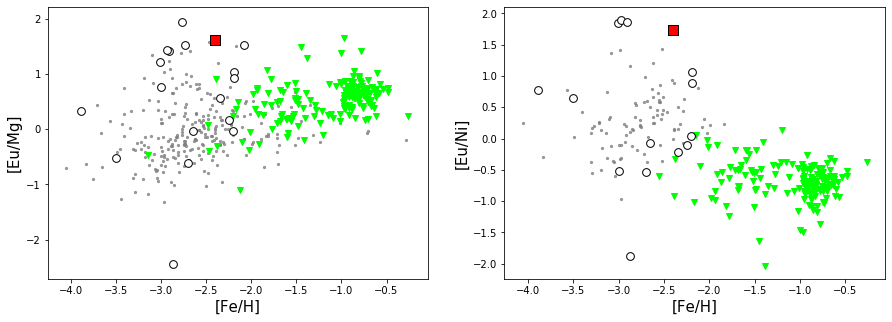

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15,5),
                        gridspec_kw={'hspace': 0.3, 'wspace': 0.2})

(ax1,ax2) = axs

data = np.genfromtxt("eumg.halo.csv", delimiter=",", names=["a", "b"])
ax1.scatter(data['a'], data['b'], color='grey', s=5, alpha=0.75)
retx=[-2.91,-2.77,-2.08,-3.01,-2.73,-2.19,-2.93]
rety=[1.42,1.94,1.53,1.22,1.52,1.03,1.44]
ax1.scatter(retx,rety, color='white', s=60,edgecolors='black')
data = np.genfromtxt("eumg.fornax.csv", delimiter=",", names=["a", "b","c","d"])
ax1.scatter(data['a'], data['d'], color='lime',marker='v')
data = np.genfromtxt("eumg.sculptor.csv", delimiter=",", names=["a", "b","c","d"])
ax1.scatter(data['a'], data['d'],  color='lime',marker='v')
data = np.genfromtxt("eumg.carina.csv", delimiter=",", names=["a", "b","c","d"])
ax1.scatter(data['a'], data['d'], color='lime',marker='v')
data = np.genfromtxt("eumg.umi.csv", delimiter=",", names=["a", "b","c","d"])
ax1.scatter(data['a'], data['d'],color='lime',marker='v')
data = np.genfromtxt("eumg.draco.csv", delimiter=",", names=["a", "b","c","d"])
ax1.scatter(data['a'], data['d'],color='lime',marker='v')
ax1.scatter(-2.4,1.618, color='red', marker='s',s=100,edgecolors='black')
cariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.7]
cariieu=[-0.21,1.15,0.23,1.47,0.21,-0.2,-1.96,-0.61]
cariimg=[-0.17,0.22,-0.34,0.71,0.73,-0.17,0.47,0]
cariiy=np.subtract(cariieu,cariimg)
cariiix=[-3.89,-2.25]
cariiieu=[1.55,0.42]
cariiimg=[1.22,0.25]
cariiiy=np.subtract(cariiieu,cariiimg)
ax1.scatter(cariix,cariiy,color='white', s=60,edgecolors='black')
ax1.scatter(cariiix,cariiiy,color='white', s=60,edgecolors='black')
ax1.set_xlabel("[Fe/H]",fontsize=15)
ax1.set_ylabel("[Eu/Mg]",fontsize=15)

retx=[-3.01,-2.97,-2.91,-2.19]
retni=[-0.16,-0.15,0,0.07]
reteu=[1.68,1.74,1.86,0.95]
rety=np.subtract(reteu,retni)
ax2.scatter(retx,rety, color='white',s=60, edgecolors='black')
data = np.genfromtxt("nieufornax.csv", delimiter=",", names=["a", "b","c","d"])
forn=data['b']-data['c']
ax2.scatter(data['a'], forn, color='lime',marker='v')
data = np.genfromtxt("nieusculptor.csv", delimiter=",", names=["a", "b","c","d"])
sculp=data['b']-data['c']
ax2.scatter(data['a'], sculp, color='lime',marker='v')
data = np.genfromtxt("nieucarina.csv", delimiter=",", names=["a", "b","c","d"])
car=data['b']-data['c']
ax2.scatter(data['a'], car, color='lime',marker='v')
data = np.genfromtxt("nieuumi.csv", delimiter=",", names=["a", "b","c","d"])
umi=data['b']-data['c']
ax2.scatter(data['a'],umi, color='lime',marker='v')
data = np.genfromtxt("nieudraco.csv", delimiter=",", names=["a", "b","c","d"])
draco=data['b']-data['c']
ax2.scatter(data['a'], draco, color='lime',marker='v')
data = np.genfromtxt("eunimwhalo.csv", delimiter=",", names=["a", "b","c","d","e","f"])
ax2.scatter(data['e'], data['f'],  color='grey',s=5, alpha=0.75)
cariix=[-2.2,-2.19,-2.35,-3.00,-3.5,-2.65,-2.87,-2.7]
cariimg=[-0.17,0.22,-0.34,0.71,0.73,-0.17,0.47,0]
cariini=[-0.25,0.09,0.44,1.99,-0.44,-0.13,-0.09,-0.08]
cariiy=np.subtract(cariieu,cariini)
cariiix=[-3.89,-2.25]
cariiieu=[1.55,0.42]
cariiiy=[0.78,-0.1]
ax2.scatter(cariix,cariiy,color='white',s=60, edgecolors='black')
ax2.scatter(cariiix,cariiiy,color='white',s=60, edgecolors='black')
heni=-0.51
heeu=1.22
hey=heeu-heni
ax2.scatter(-2.4,hey, color='red', marker='s',s=100,edgecolors='black')
ax2.set_xlabel("[Fe/H]",fontsize=15)
ax2.set_ylabel("[Eu/Ni]",fontsize=15)